# UHPC Compressive Strength Prediction

In [2]:
# Mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Import Packages

In [4]:
# Data Wrangling and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing and Metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Feature Engineering/Selection
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso, Ridge
from sklearn.feature_selection import RFE, SelectFromModel

# ML Rrgression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb

# XAI
import shap

# Model Deployment
import joblib
import streamlit as st

from IPython.display import display, HTML

## Data Preparation

In [3]:
# Quick data assessment
data_path = "./compSt_v2.csv"
df = pd.read_csv(data_path)

# Print the first five rows of the DataFrame
print("First five rows of DataFrame\n")
display(df.head())
print("\n**********************************************************************************************")

# Print the shape of the DataFrame
print(f"\n Shape of DataFrame: {df.shape}")
print("\n**********************************************************************************************")

# Get info of each column in the DataFrame
print("\nBasic Information of DataFrame\n")
print(df.info())
print("\n**********************************************************************************************")

# Get descriptive statistics of the DataFrame
print("\nSummary Statistics of Features\n")
display(df.describe().T)
print("\n**********************************************************************************************")

# Check for missing values in the DataFrame
print(f"\nNumber of missing values in each column\n\n{df.isnull().sum()}")
print("\n**********************************************************************************************")

# check number duplicates in df
print("\nNumber of duplicates: ", df.duplicated().sum())

First five rows of DataFrame



,C,SL,SF,LP,QP,FA,NS,W,S,CA,Fi,SP,RH,T,Age,fcu
0,450.0,0.0,50.0,0.0,0.0,0.0,0.0,90.0,797.0,1195,0.0,18.0,95,20,28,131.0
1,630.0,0.0,70.0,0.0,0.0,0.0,0.0,126.0,715.0,1073,0.0,18.0,95,20,28,135.0
2,810.0,0.0,90.0,0.0,0.0,0.0,0.0,162.0,616.0,923,0.0,18.0,95,20,28,137.0
3,810.0,0.0,90.0,0.0,0.0,0.0,0.0,162.0,616.0,923,0.0,18.0,95,20,28,137.0
4,630.0,180.0,90.0,0.0,0.0,0.0,0.0,126.0,616.0,923,0.0,18.0,95,20,28,150.0



**********************************************************************************************

 Shape of DataFrame: (810, 16)

**********************************************************************************************

Basic Information of DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C       810 non-null    float64
 1   SL      810 non-null    float64
 2   SF      810 non-null    float64
 3   LP      810 non-null    float64
 4   QP      810 non-null    float64
 5   FA      810 non-null    float64
 6   NS      810 non-null    float64
 7   W       810 non-null    float64
 8   S       810 non-null    float64
 9   CA      810 non-null    int64  
 10  Fi      810 non-null    float64
 11  SP      810 non-null    float64
 12  RH      810 non-null    int64  
 13  T       810 non-null    int64  
 14  Age     810 non-null    int64  
 15  fcu 

,count,mean,std,min,25%,50%,75%,max
C,810.0,737.914642,173.457225,270.00,620.2,770.5,850.000,1251.2
SL,810.0,25.194568,74.365464,0.00,0.0,0.0,0.000,375.0
SF,810.0,136.987210,104.144596,0.00,43.7,144.0,219.000,433.7
LP,810.0,41.929506,133.131451,0.00,0.0,0.0,0.000,1058.2
QP,810.0,33.270988,79.673876,0.00,0.0,0.0,0.000,397.0
FA,810.0,26.264938,67.461703,0.00,0.0,0.0,0.000,356.0
NS,810.0,3.638642,7.775957,0.00,0.0,0.0,4.000,47.5
W,810.0,179.891136,25.568235,90.00,163.0,177.0,192.500,272.6
S,810.0,995.328519,283.268562,0.00,786.4,1021.0,1231.000,1502.8
CA,810.0,154.781481,357.569121,0.00,0.0,0.0,0.000,1195.0



**********************************************************************************************

Number of missing values in each column

C      0
SL     0
SF     0
LP     0
QP     0
FA     0
NS     0
W      0
S      0
CA     0
Fi     0
SP     0
RH     0
T      0
Age    0
fcu    0
dtype: int64

**********************************************************************************************

Number of duplicates:  18


In [5]:
# Inspect duplicates

df[df.duplicated()]

,C,SL,SF,LP,QP,FA,NS,W,S,CA,Fi,SP,RH,T,Age,fcu
3,810.0,0.0,90.0,0.0,0.0,0.0,0.0,162.0,616.0,923,0.0,18.0,95,20,28,137.0
6,630.0,180.0,90.0,0.0,0.0,0.0,0.0,144.0,616.0,923,0.0,18.0,95,20,28,142.0
12,810.0,0.0,90.0,0.0,0.0,0.0,0.0,162.0,616.0,923,0.0,18.0,95,20,56,150.0
17,630.0,180.0,90.0,0.0,0.0,0.0,0.0,162.0,616.0,923,0.0,18.0,95,20,56,141.0
18,630.0,180.0,90.0,0.0,0.0,0.0,0.0,144.0,616.0,923,0.0,18.0,95,20,56,160.0
24,810.0,0.0,90.0,0.0,0.0,0.0,0.0,162.0,616.0,923,0.0,18.0,95,20,90,170.0
28,630.0,180.0,90.0,0.0,0.0,0.0,0.0,162.0,616.0,923,0.0,18.0,95,20,90,169.0
29,630.0,180.0,90.0,0.0,0.0,0.0,0.0,144.0,616.0,923,0.0,18.0,95,20,90,172.0
35,810.0,0.0,90.0,0.0,0.0,0.0,0.0,162.0,616.0,923,0.0,18.0,95,20,180,174.0
39,630.0,180.0,90.0,0.0,0.0,0.0,0.0,162.0,616.0,923,0.0,18.0,95,20,180,170.0


In [ ]:
# Drop duplicates

# df = df.drop_duplicates()

## Exploratory Data Analysis

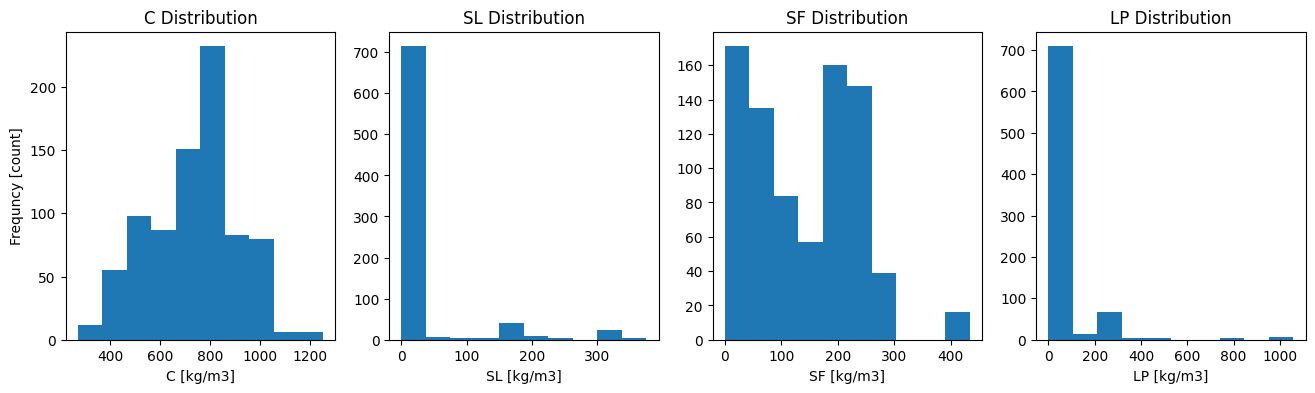

In [5]:
# Check the distribution of the data in each column
# set figsize
plt.figure(figsize = [16, 4])

plt.subplot(1, 4, 1)
plt.hist(df['C'])
plt.xlabel("C [kg/m3]")
plt.ylabel("Frequncy [count]")
plt.title("C Distribution");

plt.subplot(1, 4, 2)
plt.hist(df['SL'])
plt.xlabel("SL [kg/m3]")
plt.title("SL Distribution");

plt.subplot(1, 4, 3)
plt.hist(df['SF'])
plt.xlabel("SF [kg/m3]")
plt.title("SF Distribution");

plt.subplot(1, 4, 4)
plt.hist(df['LP'])
plt.xlabel("LP [kg/m3]")
plt.title("LP Distribution");

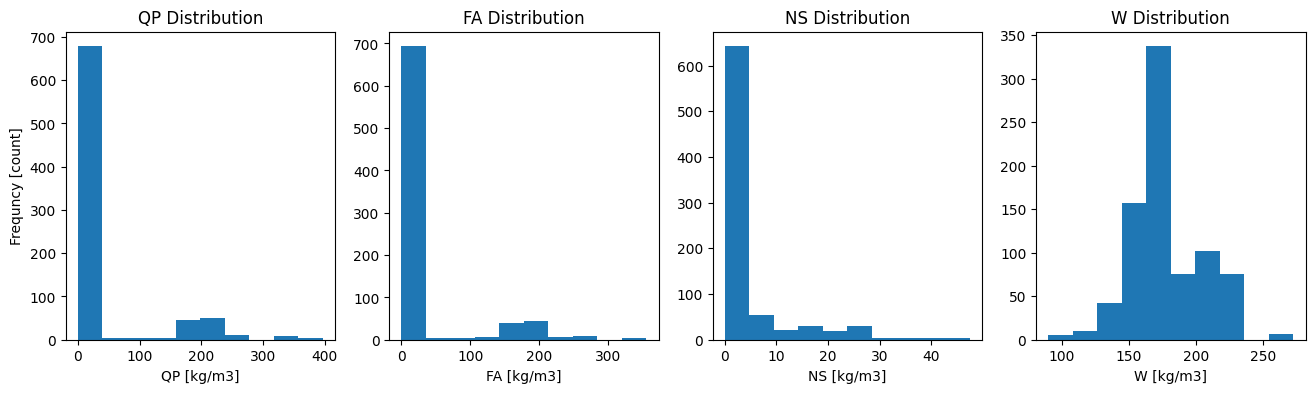

In [ ]:
plt.figure(figsize = [16, 4])

plt.subplot(1, 4, 1)
plt.hist(df['QP'])
plt.xlabel("QP [kg/m3]")
plt.ylabel("Frequncy [count]")
plt.title("QP Distribution");

plt.subplot(1, 4, 2)
plt.hist(df['FA'])
plt.xlabel("FA [kg/m3]")
plt.title("FA Distribution");

plt.subplot(1, 4, 3)
plt.hist(df['NS'])
plt.xlabel("NS [kg/m3]")
plt.title("NS Distribution");

plt.subplot(1, 4, 4)
plt.hist(df['W'])
plt.xlabel("W [kg/m3]")
plt.title("W Distribution");

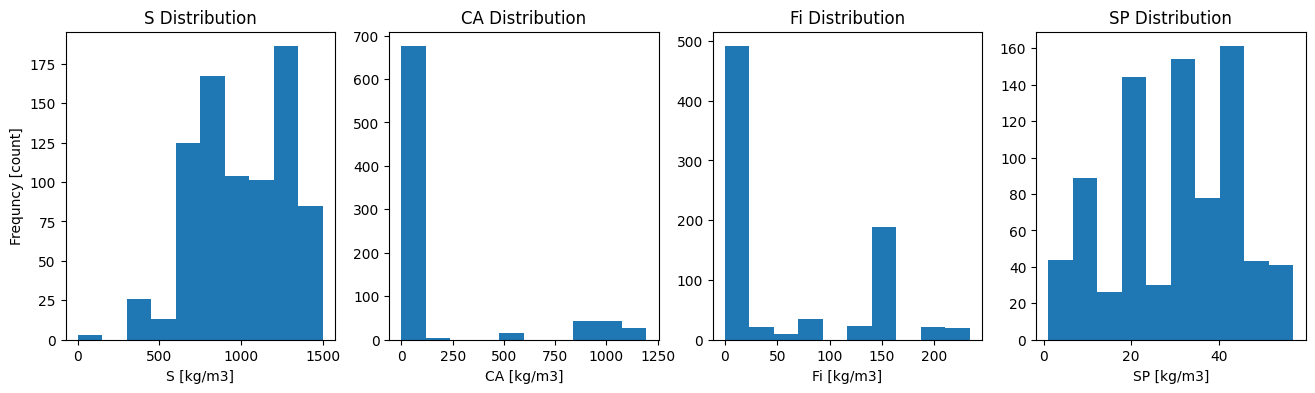

In [ ]:
plt.figure(figsize = [16, 4])

plt.subplot(1, 4, 1)
plt.hist(df['S'])
plt.xlabel("S [kg/m3]")
plt.ylabel("Frequncy [count]")
plt.title("S Distribution");

plt.subplot(1, 4, 2)
plt.hist(df['CA'])
plt.xlabel("CA [kg/m3]")
plt.title("CA Distribution");

plt.subplot(1, 4, 3)
plt.hist(df['Fi'])
plt.xlabel("Fi [kg/m3]")
plt.title("Fi Distribution");

plt.subplot(1, 4, 4)
plt.hist(df['SP'])
plt.xlabel("SP [kg/m3]")
plt.title("SP Distribution");


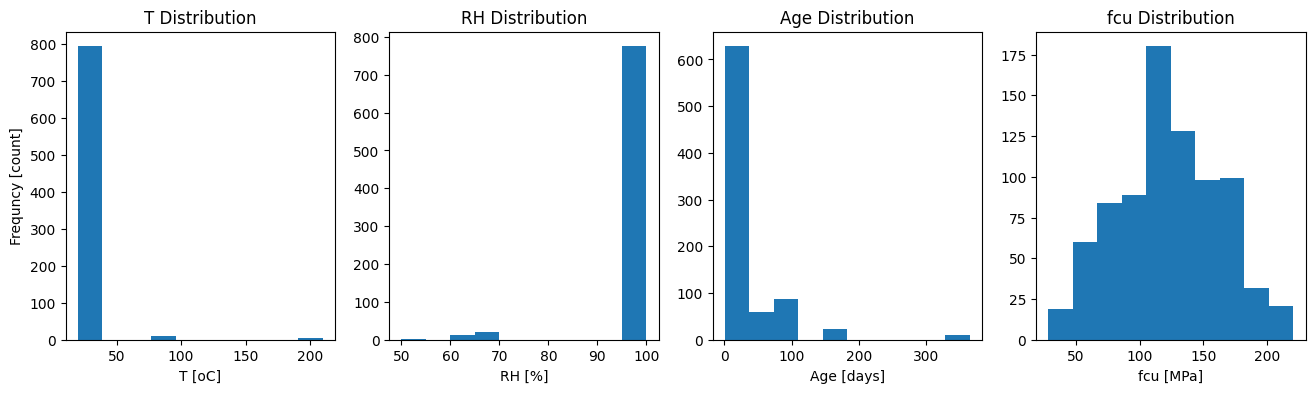

In [ ]:
plt.figure(figsize = [16, 4])

plt.subplot(1, 4, 1)
plt.hist(df['T'])
plt.xlabel("T [oC]")
plt.ylabel("Frequncy [count]")
plt.title("T Distribution");

plt.subplot(1, 4, 2)
plt.hist(df['RH'])
plt.xlabel("RH [%]")
plt.title("RH Distribution");

plt.subplot(1, 4, 3)
plt.hist(df['Age'])
plt.xlabel("Age [days]")
plt.title("Age Distribution");

plt.subplot(1, 4, 4)
plt.hist(df['fcu'])
plt.xlabel("fcu [MPa]")
plt.title("fcu Distribution");

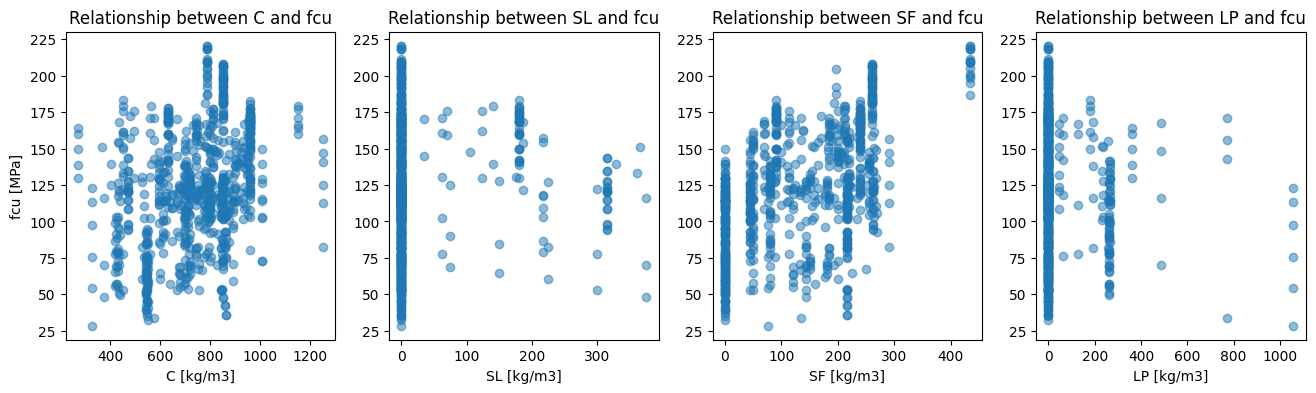

In [50]:
# Scatterplot of each feature target
# set figsize
plt.figure(figsize = [16, 4])

plt.subplot(1, 4, 1)
plt.scatter(df['C'], df['fcu'], alpha=0.5)
plt.xlabel("C [kg/m3]")
plt.ylabel("fcu [MPa]")
plt.title("Relationship between C and fcu");

plt.subplot(1, 4, 2)
plt.scatter(df['SL'], df['fcu'], alpha=0.5)
plt.xlabel("SL [kg/m3]")
plt.title("Relationship between SL and fcu");

plt.subplot(1, 4, 3)
plt.scatter(df['SF'], df['fcu'], alpha=0.5)
plt.xlabel("SF [kg/m3]")
plt.title("Relationship between SF and fcu");

plt.subplot(1, 4, 4)
plt.scatter(df['LP'], df['fcu'], alpha=0.5)
plt.xlabel("LP [kg/m3]")
plt.title("Relationship between LP and fcu");

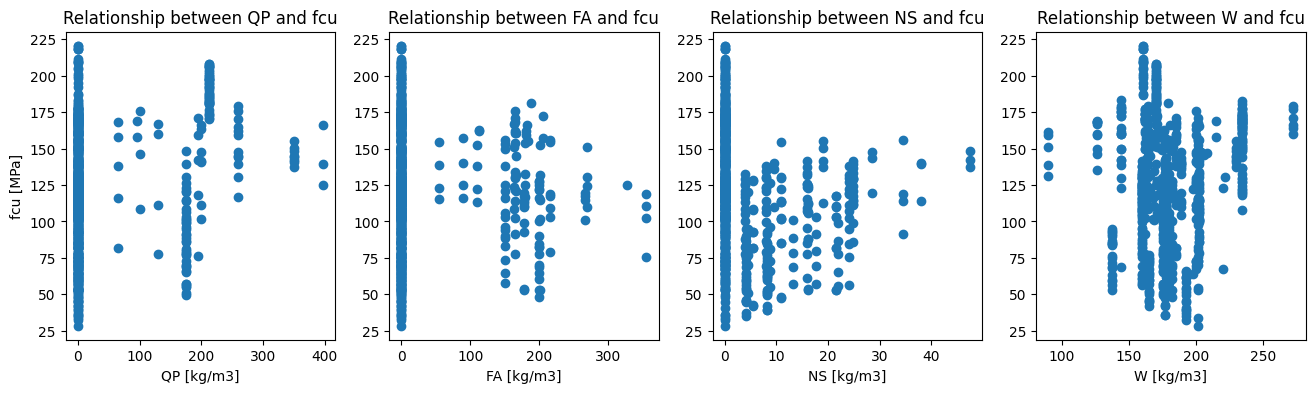

In [ ]:
# Scatterplot of each feature target
# set figsize
plt.figure(figsize = [16, 4])

plt.subplot(1, 4, 1)
plt.scatter(df['QP'], df['fcu'])
plt.xlabel("QP [kg/m3]")
plt.ylabel("fcu [MPa]")
plt.title("Relationship between QP and fcu");

plt.subplot(1, 4, 2)
plt.scatter(df['FA'], df['fcu'])
plt.xlabel("FA [kg/m3]")
plt.title("Relationship between FA and fcu");

plt.subplot(1, 4, 3)
plt.scatter(df['NS'], df['fcu'])
plt.xlabel("NS [kg/m3]")
plt.title("Relationship between NS and fcu");

plt.subplot(1, 4, 4)
plt.scatter(df['W'], df['fcu'])
plt.xlabel("W [kg/m3]")
plt.title("Relationship between W and fcu");

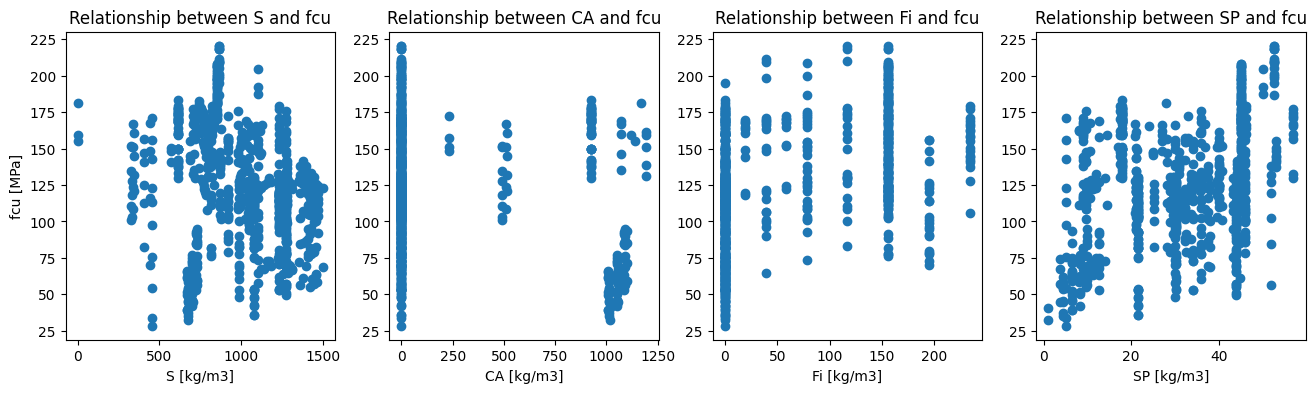

In [ ]:
# Scatterplot of each feature target
# set figsize
plt.figure(figsize = [16, 4])

plt.subplot(1, 4, 1)
plt.scatter(df['S'], df['fcu'])
plt.xlabel("S [kg/m3]")
plt.ylabel("fcu [MPa]")
plt.title("Relationship between S and fcu");

plt.subplot(1, 4, 2)
plt.scatter(df['CA'], df['fcu'])
plt.xlabel("CA [kg/m3]")
plt.title("Relationship between CA and fcu");

plt.subplot(1, 4, 3)
plt.scatter(df['Fi'], df['fcu'])
plt.xlabel("Fi [kg/m3]")
plt.title("Relationship between Fi and fcu");

plt.subplot(1, 4, 4)
plt.scatter(df['SP'], df['fcu'])
plt.xlabel("SP [kg/m3]")
plt.title("Relationship between SP and fcu");

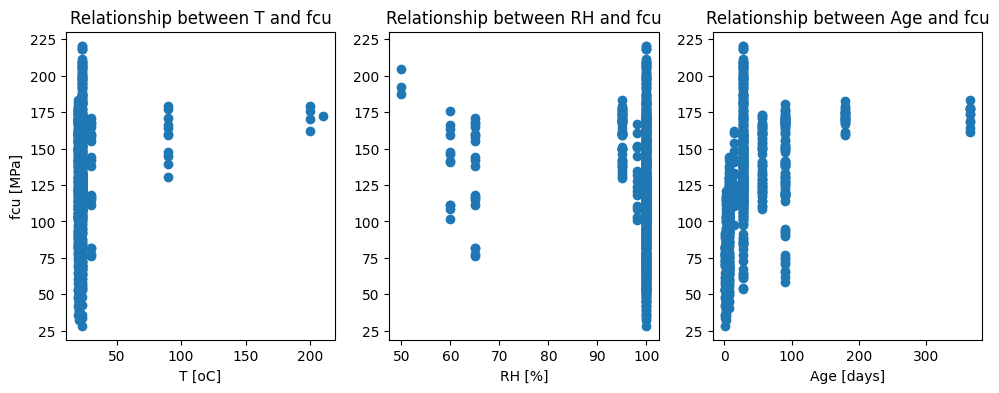

In [ ]:
# Scatterplot of each feature target
# set figsize
plt.figure(figsize = [16, 4])

plt.subplot(1, 4, 1)
plt.scatter(df['T'], df['fcu'])
plt.xlabel("T [oC]")
plt.ylabel("fcu [MPa]")
plt.title("Relationship between T and fcu");

plt.subplot(1, 4, 2)
plt.scatter(df['RH'], df['fcu'])
plt.xlabel("RH [%]")
plt.title("Relationship between RH and fcu");

plt.subplot(1, 4, 3)
plt.scatter(df['Age'], df['fcu'])
plt.xlabel("Age [days]")
plt.title("Relationship between Age and fcu");

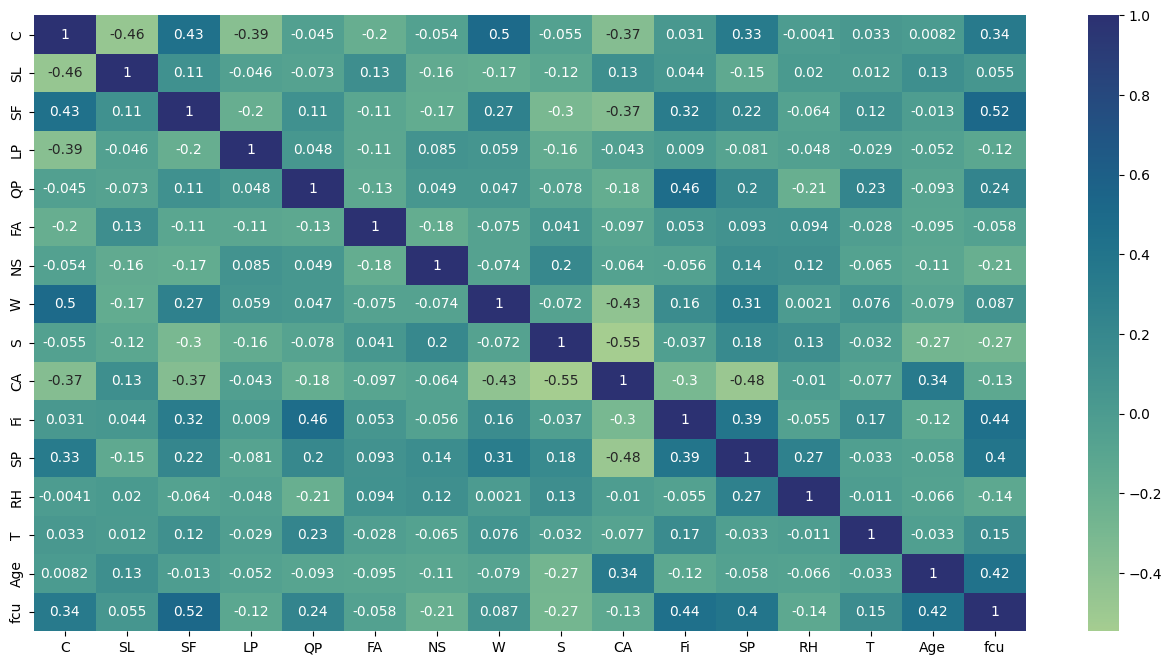

In [ ]:
# Visual corellation heatmap for numerical data
plt.figure(figsize=[16, 8])
sns.heatmap(
    df.corr(), cmap='crest', annot=True
)
plt.show()

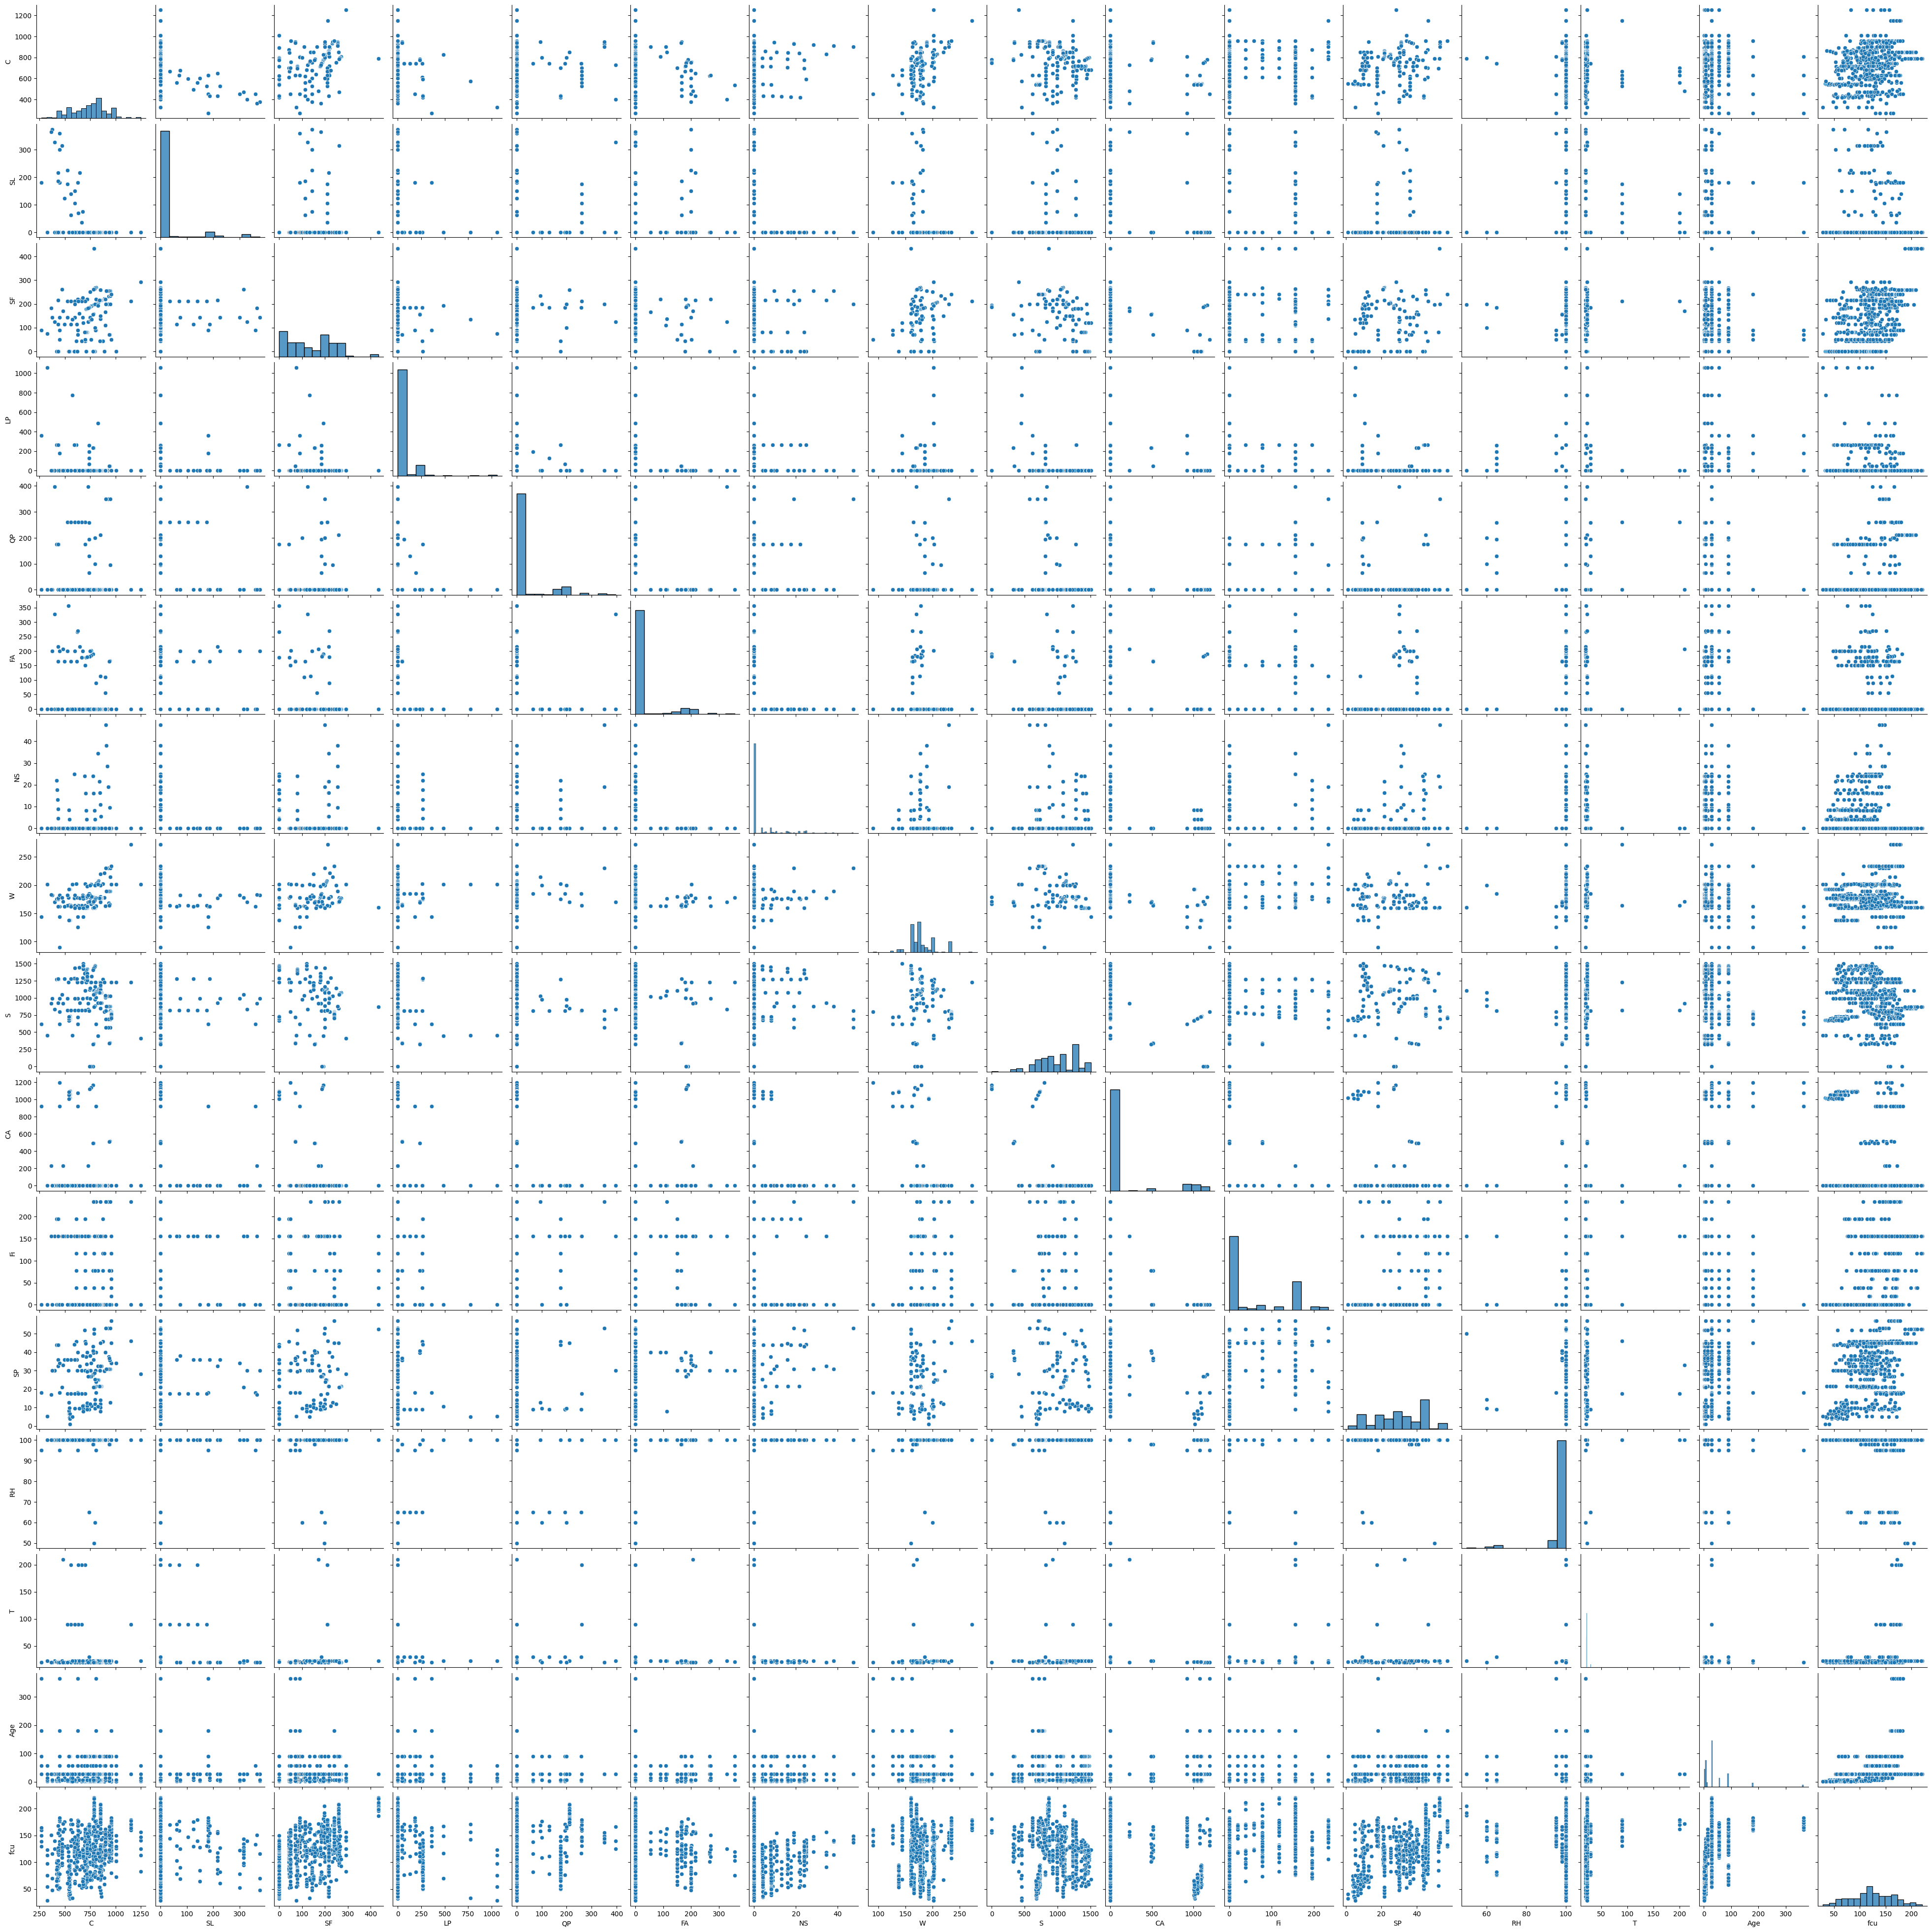

In [ ]:
# Pairplot of numerical data
sns.pairplot(data=df);

## Split Data for Training and Testing

In [5]:
X = df.drop("fcu", axis=1)
y = df['fcu']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (648, 15)
X_test Shape:  (162, 15)
y_train Shape:  (648,)
y_test Shape:  (162,)


## Build Baseline Model

In [5]:
# Root Mean Squared Error (RMSE) Function
def RMSE(test, predict):
  return np.sqrt(mean_squared_error(test, predict))

# Performance Measure Function
def performance_measure(train, pred_train, test, pred_test):
  print("Train MAE: ", round(mean_absolute_error(train, pred_train), 4), end="\t")
  print("Test MAE: ", round(mean_absolute_error(test, pred_test), 4))
  print("Train RMSE: ", round(RMSE(train, pred_train),4), end="\t")
  print("Test RMSE: ", round(RMSE(test, pred_test),4))
  print("Train R2 Score: ", round(r2_score(train, pred_train), 4), end="\t")
  print("Test R2 Score: ", round(r2_score(test, pred_test), 4))


### Linear Regression Model

In [9]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

performance_measure(y_train, y_pred_train, y_test, y_pred_test)

Train MAE:  17.2476	Test MAE:  16.5898
Train RMSE:  21.5321	Test RMSE:  20.9881
Train R2 Score:  0.7183	Test R2 Score:  0.7049


# Building ML Models

## KNN model

In [11]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [12]:
y_pred_train = knn_model.predict(X_train)
y_pred_test = knn_model.predict(X_test)

performance_measure(y_train, y_pred_train, y_test, y_pred_test)

Train MAE:  11.2382	Test MAE:  13.7609
Train RMSE:  15.0933	Test RMSE:  18.5986
Train R2 Score:  0.8616	Test R2 Score:  0.7682


### KNN with Scaling

In [13]:
knn_scaled = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("knn_regression", KNeighborsRegressor())
    ]
)
knn_scaled.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn_regression', KNeighborsRegressor())])

In [14]:
y_pred_train = knn_scaled.predict(X_train)
y_pred_test = knn_scaled.predict(X_test)

performance_measure(y_train, y_pred_train, y_test, y_pred_test)

Train MAE:  11.4724	Test MAE:  14.3007
Train RMSE:  15.0915	Test RMSE:  18.7583
Train R2 Score:  0.8616	Test R2 Score:  0.7642


### KNN with GridSearchCV

In [15]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

param_grid = {
    "n_neighbors": np.arange(1, 7),
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "weights": ['uniform', 'distance'],
    "metric": ['minkowski', 'euclidean', 'manhattan']
}

knn_gcv = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    cv=kf,
    n_jobs=-1,
    verbose=2
)
knn_gcv.fit(X_train, y_train)
knn_gcv.predict(X_test)

print("Best Score: ", knn_gcv.best_score_)
print("Best Parameter: ", knn_gcv.best_params_)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
Best Score:  0.7774260647190966
Best Parameter:  {'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}


In [16]:
y_pred_train = knn_gcv.predict(X_train)
y_pred_test = knn_gcv.predict(X_test)

performance_measure(y_train, y_pred_train, y_test, y_pred_test)

Train MAE:  11.455	Test MAE:  13.885
Train RMSE:  15.2652	Test RMSE:  18.361
Train R2 Score:  0.8584	Test R2 Score:  0.7741


## Decision Tree model

In [17]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [18]:
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

performance_measure(y_train, y_pred_train, y_test, y_pred_test)

Train MAE:  1.1821	Test MAE:  7.0251
Train RMSE:  3.3274	Test RMSE:  10.585
Train R2 Score:  0.9933	Test R2 Score:  0.9249


### Decision Tree with Scaling

In [19]:
dt_scaled = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("dt_reg", DecisionTreeRegressor(random_state=42))
    ]
)
dt_scaled.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('dt_reg', DecisionTreeRegressor(random_state=42))])

In [20]:
y_pred_train = dt_scaled.predict(X_train)
y_pred_test = dt_scaled.predict(X_test)

performance_measure(y_train, y_pred_train, y_test, y_pred_test)

Train MAE:  1.1821	Test MAE:  7.6386
Train RMSE:  3.3274	Test RMSE:  11.7905
Train R2 Score:  0.9933	Test R2 Score:  0.9069


### Decision Tree with GridSearchCV

In [21]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
param_grid = {
    'max_depth': [None, 2, 3, 5],
    'min_samples_split': [2, 5, 7],
    'max_features': [None, 1, 3, 7, 10]
}
dt_gcv = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=kf,
    n_jobs=-1,
    verbose=2
)
dt_gcv.fit(X_train, y_train)
dt_gcv.predict(X_test)

print("Best Score: ", dt_gcv.best_score_)
print("Best Parameter: ", dt_gcv.best_params_)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best Score:  0.933684150724986
Best Parameter:  {'max_depth': None, 'max_features': None, 'min_samples_split': 2}


In [22]:
y_pred_train = dt_gcv.predict(X_train)
y_pred_test = dt_gcv.predict(X_test)

performance_measure(y_train, y_pred_train, y_test, y_pred_test)

Train MAE:  1.1821	Test MAE:  7.71
Train RMSE:  3.3274	Test RMSE:  11.8145
Train R2 Score:  0.9933	Test R2 Score:  0.9065


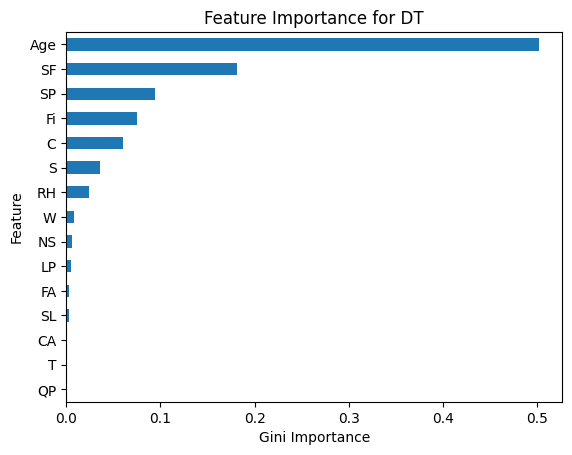

In [23]:
# Get importances
importances = dt_model.feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances, index=X_train.columns).sort_values()

# Plot series
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for DT");

## Random Forest Model

In [6]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

performance_measure(y_train, y_pred_train, y_test, y_pred_test)

Train MAE:  2.8402	Test MAE:  6.1743
Train RMSE:  4.3445	Test RMSE:  8.7936
Train R2 Score:  0.9885	Test R2 Score:  0.9482


### Random Forest with Scaling

In [26]:
rf_scaled = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("rf_regression", RandomForestRegressor(random_state=42))
    ]
)
rf_scaled.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf_regression', RandomForestRegressor(random_state=42))])

In [27]:
y_pred_train = rf_scaled.predict(X_train)
y_pred_test = rf_scaled.predict(X_test)

performance_measure(y_train, y_pred_train, y_test, y_pred_test)

Train MAE:  2.8351	Test MAE:  6.1808
Train RMSE:  4.336	Test RMSE:  8.7929
Train R2 Score:  0.9886	Test R2 Score:  0.9482


### Random Forest with GridSearchCV

In [9]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 3, 4, 5],
    'max_features': [None, 2, 5, 10, 15]
}
rf_gcv = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=kf,
    n_jobs=-1,
    verbose=0
)
rf_gcv.fit(X_train, y_train)
rf_gcv.predict(X_test)

print("Best Score: ", rf_gcv.best_score_)
print("Best Parameter: ", rf_gcv.best_params_)

Best Score:  0.9546444978459615
Best Parameter:  {'max_depth': None, 'max_features': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [10]:
y_pred_train = rf_gcv.predict(X_train)
y_pred_test = rf_gcv.predict(X_test)

performance_measure(y_train, y_pred_train, y_test, y_pred_test)

Train MAE:  2.783	Test MAE:  5.8697
Train RMSE:  4.2712	Test RMSE:  8.0882
Train R2 Score:  0.9889	Test R2 Score:  0.9562


In [ ]:
# Save the model

joblib.dump(rf_gcv, "rf_gcv.pkl")

['rf_gcv.pkl']

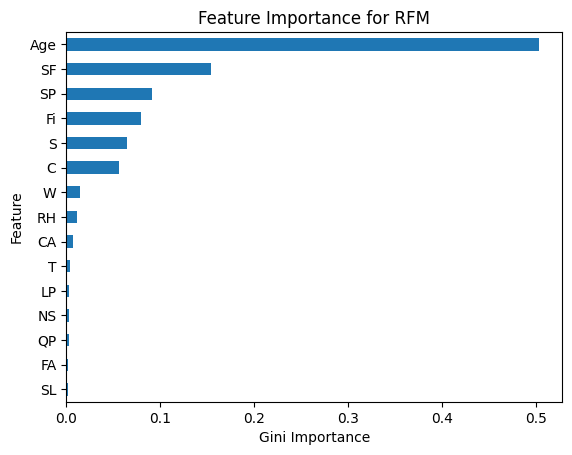

In [30]:
# Get importances
importances = rf_model.feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances, index=X_train.columns).sort_values()

# Plot series
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for RFM");

## Support Vector Regressor

In [31]:
# Support vector regression
svr_model = SVR(kernel="linear")
svr_model.fit(X_train, y_train)

SVR(kernel='linear')

In [32]:
y_pred_train = svr_model.predict(X_train)
y_pred_test = svr_model.predict(X_test)

performance_measure(y_train, y_pred_train, y_test, y_pred_test)

Train MAE:  16.7571	Test MAE:  16.0633
Train RMSE:  22.1035	Test RMSE:  21.1583
Train R2 Score:  0.7032	Test R2 Score:  0.7001


### Support Vector Regressor with GridSearchCV

In [ ]:
# GridSearch for the SVR

kf = KFold(n_splits=10, shuffle=True, random_state=42)
param_grid = {
    'kernel': ['linear'],
    'C': [1.0, 10.0, 100.0],
}
svr_gcv = GridSearchCV(
    estimator=SVR(),
    param_grid=param_grid,
    cv=kf,
    n_jobs=-1,
    verbose=1
)
svr_gcv.fit(X_train, y_train)
svr_gcv.predict(X_test)

print("Best Score: ", svr_gcv.best_score_)
print("Best Parameter: ", svr_gcv.best_params_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Best Score:  0.684973726089505
Best Parameter:  {'C': 1.0, 'kernel': 'linear'}


In [ ]:
y_pred_train = svr_gcv.predict(X_train)
y_pred_test = svr_gcv.predict(X_test)

performance_measure(y_train, y_pred_train, y_test, y_pred_test)

Train MAE:  16.7571	Test MAE:  16.0633
Train RMSE:  22.1035	Test RMSE:  21.1583
Train R2 Score:  0.7032	Test R2 Score:  0.7001


## XGboost Regressor

In [12]:
# Xgboost regressor

xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [13]:
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

performance_measure(y_train, y_pred_train, y_test, y_pred_test)

Train MAE:  1.693	Test MAE:  5.8107
Train RMSE:  3.4278	Test RMSE:  8.2833
Train R2 Score:  0.9929	Test R2 Score:  0.954


### XGboost Regressor with GridSearchCV

In [14]:
# Xgboost with grid search

kf = KFold(n_splits=10, shuffle=True, random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.1, 0.3, 0.5],
    'max_depth': [None, 3, 5, 10],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0.0, 0.5, 1.0, 1.5]
}
xgb_gcv = GridSearchCV(
    estimator=xgb.XGBRegressor(objective="reg:squarederror", random_state=42),
    param_grid=param_grid,
    cv=kf,
    n_jobs=-1,
    verbose=0
)
xgb_gcv.fit(X_train, y_train)
xgb_gcv.predict(X_test)

print("Best Score: ", xgb_gcv.best_score_)
print("Best Parameter: ", xgb_gcv.best_params_)

Best Score:  0.9631439852056815
Best Parameter:  {'colsample_bytree': 1.0, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400, 'subsample': 0.7}


In [15]:
y_pred_train = xgb_gcv.predict(X_train)
y_pred_test = xgb_gcv.predict(X_test)

performance_measure(y_train, y_pred_train, y_test, y_pred_test)

Train MAE:  2.1189	Test MAE:  4.9873
Train RMSE:  3.6205	Test RMSE:  7.0016
Train R2 Score:  0.992	Test R2 Score:  0.9672


In [16]:
# save the model

joblib.dump(xgb_gcv, "xgb_gcv.pkl")

['xgb_gcv.pkl']

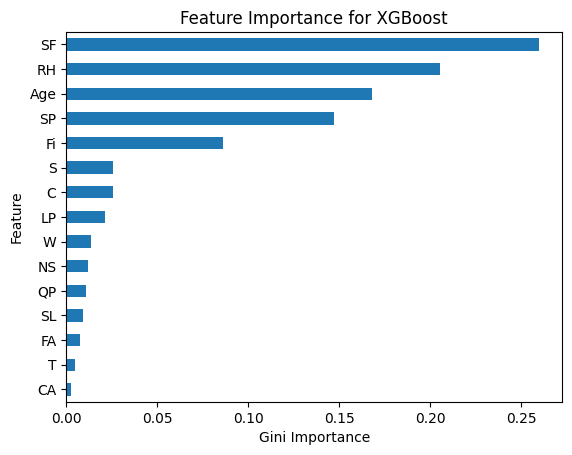

In [37]:
# Get importances
importances = xgb_model.feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances, index=X_train.columns).sort_values()

# Plot series
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for XGBoost");

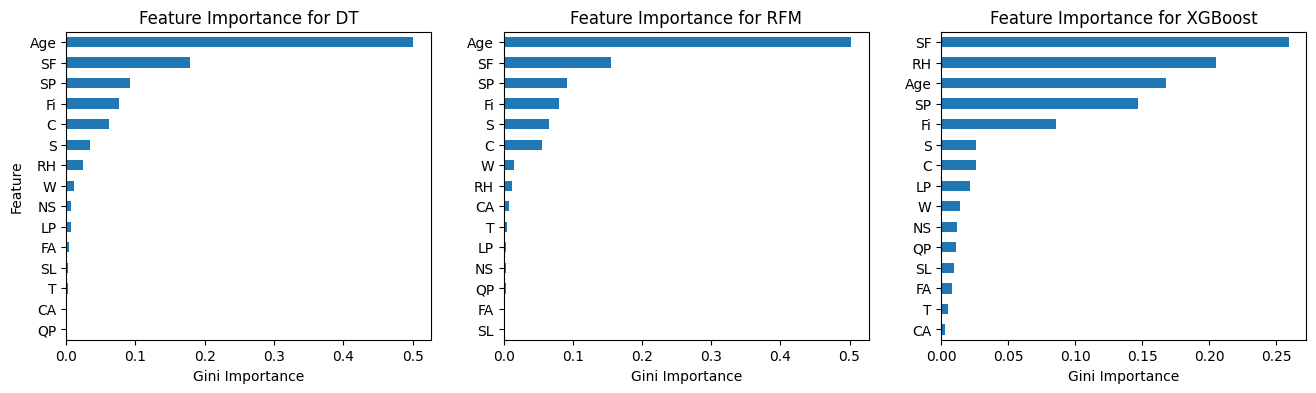

In [ ]:
# set figsize
plt.figure(figsize = [16, 4])

plt.subplot(1, 3, 1)
# Get importances
importances = dt_model.feature_importances_
# Put importances into a Series
feat_imp = pd.Series(importances, index=X_train.columns).sort_values()
# Plot series
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for DT");

plt.subplot(1, 3, 2)
# Get importances
importances = rf_model.feature_importances_
# Put importances into a Series
feat_imp = pd.Series(importances, index=X_train.columns).sort_values()
# Plot series
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.title("Feature Importance for RFM");


plt.subplot(1, 3, 3)
# Get importances
importances = xgb_model.feature_importances_
# Put importances into a Series
feat_imp = pd.Series(importances, index=X_train.columns).sort_values()
# Plot series
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.title("Feature Importance for XGBoost");

In [ ]:
y_test.head()

247    153.3
670    134.3
227    127.4
290    195.2
538    130.6
Name: fcu, dtype: float64

## Save predictions

In [ ]:
# Saving each prediction to dataframe
test_predictions = pd.DataFrame(y_test)
test_predictions["lr_predict"] = lr_model.predict(X_test)
test_predictions["knn_predict"] = knn_gcv.predict(X_test)
test_predictions["dt_predict"] = dt_gcv.predict(X_test)
test_predictions["rf_predict"] = rf_gcv.predict(X_test)
test_predictions["svr_predict"] = svr_model.predict(X_test)
test_predictions["xgb_predict"] = xgb_gcv.predict(X_test)
test_predictions.head()

,fcu,lr_predict,knn_predict,dt_predict,rf_predict,svr_predict,xgb_predict
247,153.3,112.570626,128.04,156.000000,151.124650,114.898776,153.428802
670,134.3,131.092421,129.28,124.050000,124.870118,126.700446,124.420868
227,127.4,130.396922,129.76,130.300000,130.111626,125.872562,129.477478
290,195.2,177.979343,190.06,190.578182,190.876054,180.373950,190.578812
538,130.6,140.075368,153.34,139.600000,144.162967,138.533178,142.639664


In [38]:
# change directory
import os
os.chdir("/content/drive/MyDrive/myMScThesis/datasets/CompStrPrediction/")

In [ ]:
test_predictions.to_csv("test_predictions.csv", index=False)

In [39]:
# load predictions
test_predictions = pd.read_csv("test_predictions.csv")
test_predictions.head()

,fcu,lr_predict,knn_predict,dt_predict,rf_predict,svr_predict,xgb_predict
0,153.3,112.570626,128.04,156.000000,151.124650,114.898776,153.42880
1,134.3,131.092421,129.28,124.050000,124.870118,126.700446,124.42087
2,127.4,130.396922,129.76,130.300000,130.111626,125.872562,129.47748
3,195.2,177.979343,190.06,190.578182,190.876054,180.373950,190.57881
4,130.6,140.075368,153.34,139.600000,144.162967,138.533178,142.63966


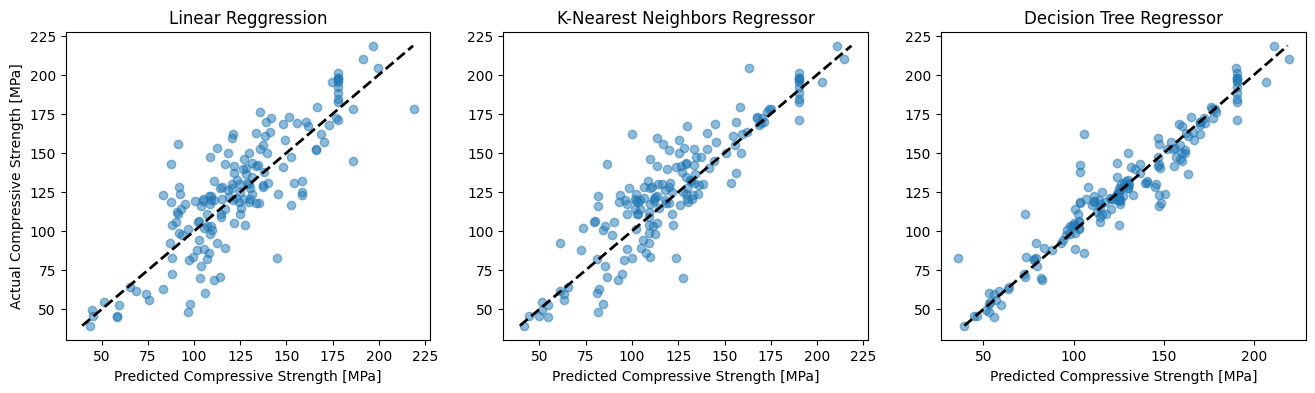

In [40]:
# set figsize
plt.figure(figsize = [16, 4])

plt.subplot(1, 3, 1)
plt.scatter(test_predictions["lr_predict"], test_predictions["fcu"], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted Compressive Strength [MPa]")
plt.ylabel("Actual Compressive Strength [MPa]")
plt.title("Linear Reggression");

plt.subplot(1, 3, 2)
plt.scatter(test_predictions["knn_predict"], test_predictions["fcu"], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted Compressive Strength [MPa]")
plt.title("K-Nearest Neighbors Regressor");

plt.subplot(1, 3, 3)
plt.scatter(test_predictions["dt_predict"], test_predictions["fcu"], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted Compressive Strength [MPa]")
plt.title("Decision Tree Regressor");

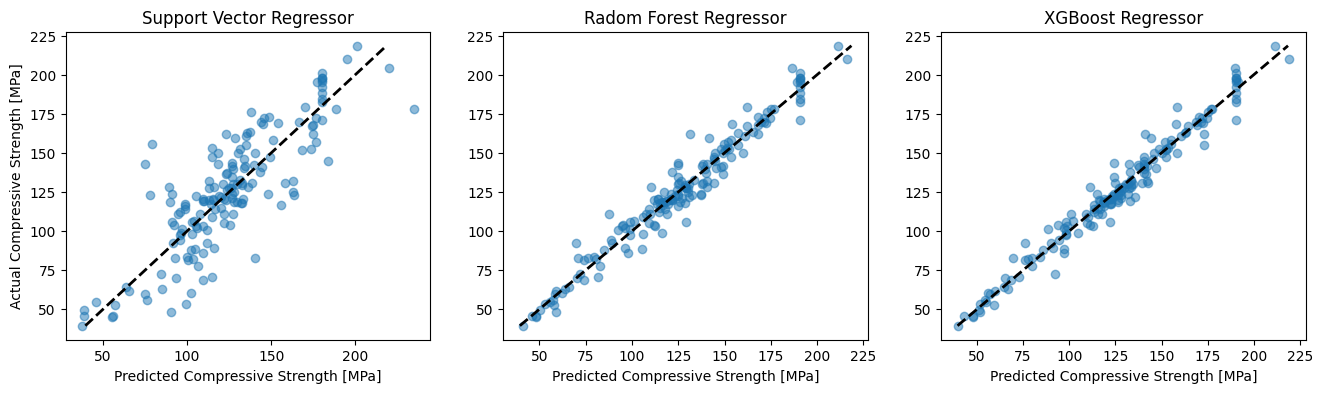

In [41]:
# set figsize
plt.figure(figsize = [16, 4])

plt.subplot(1, 3, 1)
plt.scatter(test_predictions["svr_predict"], test_predictions["fcu"], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted Compressive Strength [MPa]")
plt.ylabel("Actual Compressive Strength [MPa]")
plt.title("Support Vector Regressor");

plt.subplot(1, 3, 2)
plt.scatter(test_predictions["rf_predict"], test_predictions["fcu"], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted Compressive Strength [MPa]")
plt.title("Radom Forest Regressor");

plt.subplot(1, 3, 3)
plt.scatter(test_predictions["xgb_predict"], test_predictions["fcu"], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted Compressive Strength [MPa]")
plt.title("XGBoost Regressor");

## Feature Selection (FS)

### FS Using Feature Importance

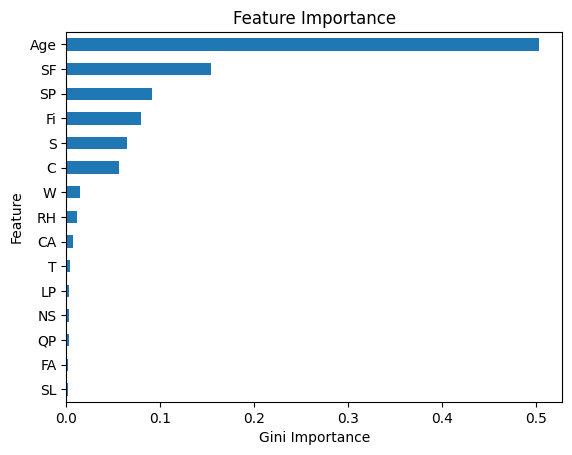

In [ ]:
# Get importances
importances = rf_model.feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances, index=X_train.columns).sort_values()

# Plot series
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [ ]:
# Check columns
df.columns

Index(['C', 'SL', 'SF', 'LP', 'QP', 'FA', 'NS', 'W', 'S', 'CA', 'Fi', 'SP',
       'RH', 'T', 'Age', 'fcu'],
      dtype='object')

In [ ]:
# Select the most important data
imp_columns = ['C', 'SF', 'W', 'S', 'CA', 'Fi', 'SP', 'Age', 'fcu']
df_imp = df[imp_columns]
df_imp.head()

,C,SF,W,S,CA,Fi,SP,Age,fcu
0,450.0,50.0,90.0,797.0,1195,0.0,18.0,28,131.0
1,630.0,70.0,126.0,715.0,1073,0.0,18.0,28,135.0
2,810.0,90.0,162.0,616.0,923,0.0,18.0,28,137.0
3,810.0,90.0,162.0,616.0,923,0.0,18.0,28,137.0
4,630.0,90.0,126.0,616.0,923,0.0,18.0,28,150.0


In [ ]:
# Split Data
X_imp = df_imp.drop("fcu", axis=1)
y_imp = df_imp["fcu"]

X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_imp, y_imp, test_size=0.2, random_state=42)

print("X_train_imp Shape: ", X_train_imp.shape)
print("X_test_imp Shape: ", X_test_imp.shape)
print("y_train_imp Shape: ", y_train_imp.shape)
print("y_test_imp Shape: ", y_test_imp.shape)

X_train_imp Shape:  (648, 8)
X_test_imp Shape:  (162, 8)
y_train_imp Shape:  (648,)
y_test_imp Shape:  (162,)


#### Random Forest Model with FS Imp

In [ ]:
rf_model_imp = RandomForestRegressor(random_state=42)
rf_model_imp.fit(X_train_imp, y_train_imp)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_train_imp = rf_model_imp.predict(X_train_imp)
y_pred_test_imp = rf_model_imp.predict(X_test_imp)

performance_measure(y_train_imp, y_pred_train_imp, y_test_imp, y_pred_test_imp)

Train MAE:  2.9228	Test MAE:  6.2929
Train RMSE:  4.4112	Test RMSE:  9.0667
Train R2 Score:  0.9882	Test R2 Score:  0.9449


### FS Using Correlation

In [17]:
# Compute the correlation of each feature with the target
correlations = X.apply(lambda x: x.corr(y))

# Rank features by absolute correlation
correlation_rank = correlations.abs().sort_values(ascending=False)
print(correlation_rank)

# Select top k features based on correlation
k = 8  # Number of top features to select
selected_features = correlation_rank.head(k).index
print("\nSelected Features: ", selected_features)


SF     0.521135
Fi     0.440338
Age    0.415362
SP     0.395740
C      0.337350
S      0.274860
QP     0.237965
NS     0.205789
T      0.150839
RH     0.135059
CA     0.130781
LP     0.120639
W      0.086805
FA     0.058166
SL     0.055492
dtype: float64

Selected Features:  Index(['SF', 'Fi', 'Age', 'SP', 'C', 'S', 'QP', 'NS'], dtype='object')


In [18]:
# Select the with high correlation with target
corr_columns = ['C', 'SF', 'QP', 'NS', 'S', 'Fi', 'SP', 'Age', 'fcu']
df_corr = df[corr_columns]
df_corr.head()

,C,SF,QP,NS,S,Fi,SP,Age,fcu
0,450.0,50.0,0.0,0.0,797.0,0.0,18.0,28,131.0
1,630.0,70.0,0.0,0.0,715.0,0.0,18.0,28,135.0
2,810.0,90.0,0.0,0.0,616.0,0.0,18.0,28,137.0
3,810.0,90.0,0.0,0.0,616.0,0.0,18.0,28,137.0
4,630.0,90.0,0.0,0.0,616.0,0.0,18.0,28,150.0


In [19]:
# Split Data
X_corr = df_corr.drop("fcu", axis=1)
y_corr = df_corr["fcu"]

X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split(X_corr, y_corr, test_size=0.2, random_state=42)

print("X_train_corr Shape: ", X_train_corr.shape)
print("X_test_corr Shape: ", X_test_corr.shape)
print("y_train_corr Shape: ", y_train_corr.shape)
print("y_test_corr Shape: ", y_test_corr.shape)

X_train_corr Shape:  (648, 8)
X_test_corr Shape:  (162, 8)
y_train_corr Shape:  (648,)
y_test_corr Shape:  (162,)


#### Linear Regression Model with FS Corr

In [ ]:
lr_model_corr = LinearRegression()
lr_model_corr.fit(X_train_corr, y_train_corr)

LinearRegression()

In [ ]:
y_pred_train_corr = lr_model_corr.predict(X_train_corr)
y_pred_test_corr = lr_model_corr.predict(X_test_corr)

performance_measure(y_train_corr, y_pred_train_corr, y_test_corr, y_pred_test_corr)

Train MAE:  20.0036	Test MAE:  19.2726
Train RMSE:  24.1199	Test RMSE:  23.9629
Train R2 Score:  0.6466	Test R2 Score:  0.6153


#### KNN with FS Corr

In [ ]:
knn_model_corr = KNeighborsRegressor()
knn_model_corr.fit(X_train_corr, y_train_corr)

KNeighborsRegressor()

In [ ]:
y_pred_train_corr = knn_model_corr.predict(X_train_corr)
y_pred_test_corr = knn_model_corr.predict(X_test_corr)

performance_measure(y_train_corr, y_pred_train_corr, y_test_corr, y_pred_test_corr)

Train MAE:  11.0475	Test MAE:  13.9671
Train RMSE:  15.0715	Test RMSE:  18.2448
Train R2 Score:  0.862	Test R2 Score:  0.777


In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

param_grid = {
    "n_neighbors": np.arange(1, 20),
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "weights": ['uniform', 'distance'],
    "metric": ['minkowski', 'euclidean', 'manhattan']
}

knn_gcv_corr = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    cv=kf,
    n_jobs=-1,
    verbose=1
)
knn_gcv_corr.fit(X_train_corr, y_train_corr)
knn_gcv_corr.predict(X_test_corr)

print("Best Score: ", knn_gcv_corr.best_score_)
print("Best Parameter: ", knn_gcv_corr.best_params_)

Fitting 10 folds for each of 456 candidates, totalling 4560 fits
Best Score:  0.7973897640030557
Best Parameter:  {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'distance'}


In [ ]:
y_pred_train_corr = knn_gcv_corr.predict(X_train_corr)
y_pred_test_corr = knn_gcv_corr.predict(X_test_corr)

performance_measure(y_train_corr, y_pred_train_corr, y_test_corr, y_pred_test_corr)

Train MAE:  1.4707	Test MAE:  12.8384
Train RMSE:  3.7032	Test RMSE:  16.9348
Train R2 Score:  0.9917	Test R2 Score:  0.8079


#### Random Forest Model with FS Corr

In [ ]:
rf_model_corr = RandomForestRegressor(random_state=42)
rf_model_corr.fit(X_train_corr, y_train_corr)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_train_corr = rf_model_corr.predict(X_train_corr)
y_pred_test_corr = rf_model_corr.predict(X_test_corr)

performance_measure(y_train_corr, y_pred_train_corr, y_test_corr, y_pred_test_corr)

Train MAE:  3.0596	Test MAE:  6.5865
Train RMSE:  4.5798	Test RMSE:  9.1467
Train R2 Score:  0.9873	Test R2 Score:  0.9439


In [20]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
param_grid = {
    'n_estimators': [50, 70, 100, 200],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 3, 4, 5],
    'max_features': [None, 3, 5, 7]
}
rf_gcv_corr = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=kf,
    n_jobs=-1,
    verbose=1
)
rf_gcv_corr.fit(X_train_corr, y_train_corr)
rf_gcv_corr.predict(X_test_corr)

print("Best Score: ", rf_gcv_corr.best_score_)
print("Best Parameter: ", rf_gcv_corr.best_params_)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


Best Score:  0.9522958321505017
Best Parameter:  {'max_depth': None, 'max_features': 7, 'min_samples_split': 2, 'n_estimators': 100}


In [21]:
y_pred_train_corr = rf_gcv_corr.predict(X_train_corr)
y_pred_test_corr = rf_gcv_corr.predict(X_test_corr)

performance_measure(y_train_corr, y_pred_train_corr, y_test_corr, y_pred_test_corr)

Train MAE:  3.0577	Test MAE:  6.544
Train RMSE:  4.5935	Test RMSE:  8.9114
Train R2 Score:  0.9872	Test R2 Score:  0.9468


In [22]:
# save the model

joblib.dump(rf_gcv_corr, "rf_gcv_corr.pkl")

['rf_gcv_corr.pkl']

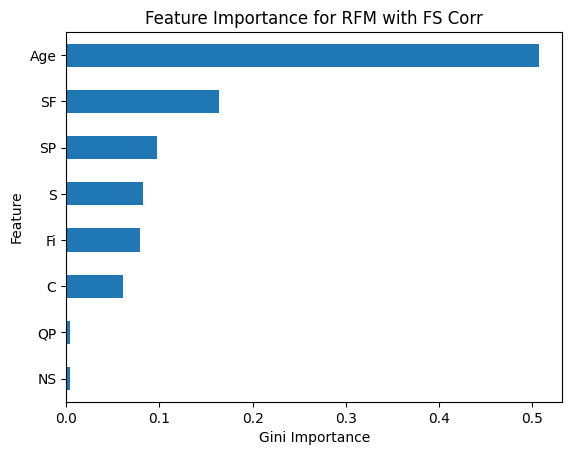

In [ ]:
# Get importances
importances = rf_model_corr.feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances, index=X_train_corr.columns).sort_values()

# Plot series
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for RFM with FS Corr");

#### XGBoost with FS Corr

In [ ]:
xgb_model_corr = xgb.XGBRegressor(random_state=42)
xgb_model_corr.fit(X_train_corr, y_train_corr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_train_corr = xgb_model_corr.predict(X_train_corr)
y_pred_test_corr = xgb_model_corr.predict(X_test_corr)

performance_measure(y_train_corr, y_pred_train_corr, y_test_corr, y_pred_test_corr)

Train MAE:  1.8762	Test MAE:  6.0725
Train RMSE:  3.7611	Test RMSE:  8.7611
Train R2 Score:  0.9914	Test R2 Score:  0.9486


In [23]:
# Xgboost with grid search

kf = KFold(n_splits=10, shuffle=True, random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.1, 0.3, 0.5],
    'max_depth': [None, 3, 5, 10],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0.0, 0.5, 1.0, 1.5]
}
xgb_gcv_corr = GridSearchCV(
    estimator=xgb.XGBRegressor(objective="reg:squarederror", random_state=42),
    param_grid=param_grid,
    cv=kf,
    n_jobs=-1,
    verbose=1
)
xgb_gcv_corr.fit(X_train_corr, y_train_corr)
xgb_gcv_corr.predict(X_test_corr)

print("Best Score: ", xgb_gcv_corr.best_score_)
print("Best Parameter: ", xgb_gcv_corr.best_params_)

Fitting 10 folds for each of 2304 candidates, totalling 23040 fits
Best Score:  0.9602158919367205
Best Parameter:  {'colsample_bytree': 1.0, 'gamma': 1.5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.5}


In [24]:
y_pred_train_corr = xgb_gcv_corr.predict(X_train_corr)
y_pred_test_corr = xgb_gcv_corr.predict(X_test_corr)

performance_measure(y_train_corr, y_pred_train_corr, y_test_corr, y_pred_test_corr)

Train MAE:  2.7008	Test MAE:  5.4823
Train RMSE:  4.1706	Test RMSE:  8.0433
Train R2 Score:  0.9894	Test R2 Score:  0.9567


In [25]:
# save the model

joblib.dump(xgb_gcv_corr, "xgb_gcv_corr.pkl")

['xgb_gcv_corr.pkl']

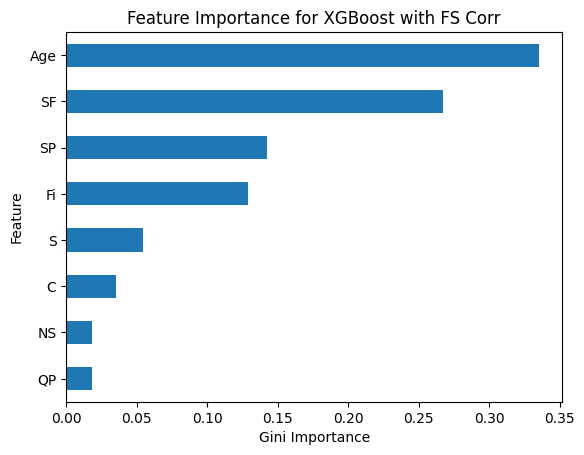

In [ ]:
# Get importances
importances = xgb_model_corr.feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances, index=X_train_corr.columns).sort_values()

# Plot series
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for XGBoost with FS Corr");

#### SVR with FS Corr

In [ ]:
# Support vector regression
svr_model_corr = SVR(kernel="linear")
svr_model_corr.fit(X_train_corr, y_train_corr)

SVR(kernel='linear')

In [ ]:
y_pred_train_corr = svr_model_corr.predict(X_train_corr)
y_pred_test_corr = svr_model_corr.predict(X_test_corr)

performance_measure(y_train_corr, y_pred_train_corr, y_test_corr, y_pred_test_corr)

Train MAE:  19.6145	Test MAE:  18.9378
Train RMSE:  24.9477	Test RMSE:  24.6454
Train R2 Score:  0.6219	Test R2 Score:  0.593


#### DT with FS Corr

In [ ]:
dt_model_corr = DecisionTreeRegressor()
dt_model_corr.fit(X_train_corr, y_train_corr)

DecisionTreeRegressor()

In [ ]:
y_pred_train_corr = dt_model_corr.predict(X_train_corr)
y_pred_test_corr = dt_model_corr.predict(X_test_corr)

performance_measure(y_train_corr, y_pred_train_corr, y_test_corr, y_pred_test_corr)

Train MAE:  1.4688	Test MAE:  7.8611
Train RMSE:  3.6983	Test RMSE:  11.403
Train R2 Score:  0.9917	Test R2 Score:  0.9129


In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
param_grid = {
    'max_depth': [None, 2, 3, 5],
    'min_samples_split': [2, 5, 7],
    'max_features': [None, 1, 3, 7, 10]
}
dt_gcv_corr = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=kf,
    n_jobs=-1,
    verbose=2
)
dt_gcv_corr.fit(X_train_corr, y_train_corr)
dt_gcv_corr.predict(X_test_corr)

print("Best Score: ", dt_gcv_corr.best_score_)
print("Best Parameter: ", dt_gcv_corr.best_params_)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best Score:  0.9297129338944494
Best Parameter:  {'max_depth': None, 'max_features': None, 'min_samples_split': 2}


In [ ]:
y_pred_train_corr = dt_gcv_corr.predict(X_train_corr)
y_pred_test_corr = dt_gcv_corr.predict(X_test_corr)

performance_measure(y_train_corr, y_pred_train_corr, y_test_corr, y_pred_test_corr)

Train MAE:  1.4688	Test MAE:  7.8454
Train RMSE:  3.6983	Test RMSE:  11.5353
Train R2 Score:  0.9917	Test R2 Score:  0.9108


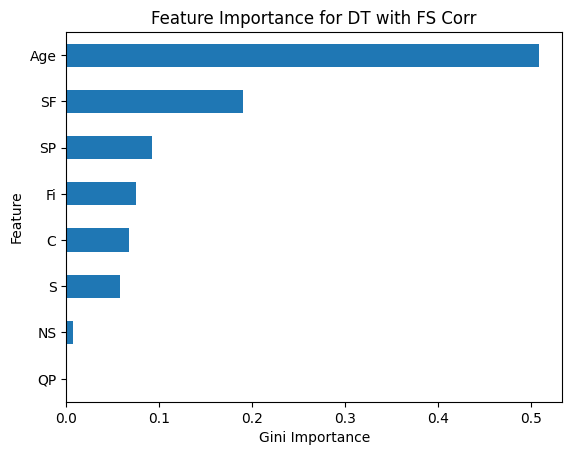

In [ ]:
# Get importances
importances = dt_model_corr.feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances, index=X_train_corr.columns).sort_values()

# Plot series
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for DT with FS Corr");

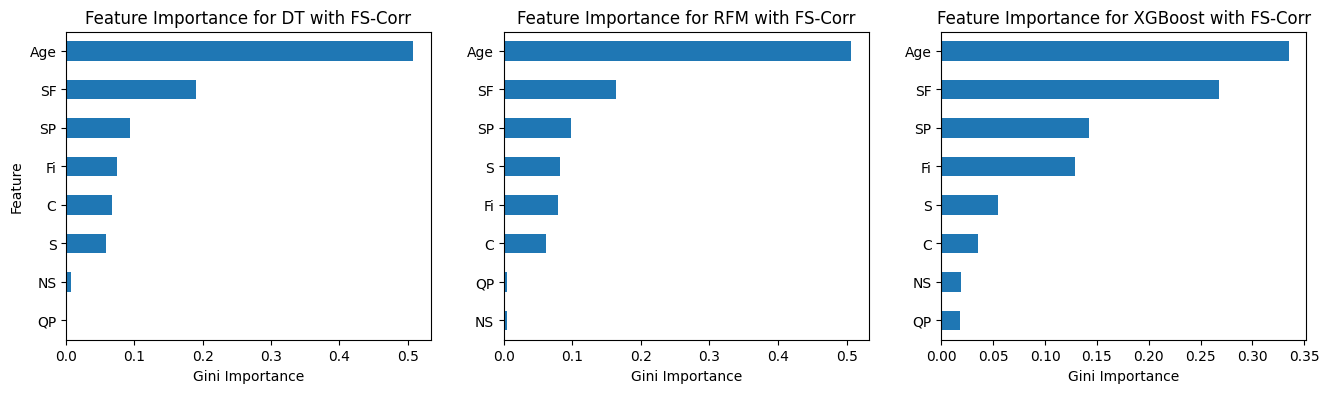

In [ ]:
# set figsize
plt.figure(figsize = [16, 4])

plt.subplot(1, 3, 1)
# Get importances
importances = dt_model_corr.feature_importances_
# Put importances into a Series
feat_imp = pd.Series(importances, index=X_train_corr.columns).sort_values()
# Plot series
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for DT with FS-Corr");

plt.subplot(1, 3, 2)
# Get importances
importances = rf_model_corr.feature_importances_
# Put importances into a Series
feat_imp = pd.Series(importances, index=X_train_corr.columns).sort_values()
# Plot series
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.title("Feature Importance for RFM with FS-Corr");


plt.subplot(1, 3, 3)
# Get importances
importances = xgb_model_corr.feature_importances_
# Put importances into a Series
feat_imp = pd.Series(importances, index=X_train_corr.columns).sort_values()
# Plot series
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.title("Feature Importance for XGBoost with FS-Corr");


### Save Predictions

In [ ]:
# Saving the prediction
test_predictions_corr = pd.DataFrame(y_test_corr)
test_predictions_corr["lr_predict"] = lr_model_corr.predict(X_test_corr)
test_predictions_corr["knn_predict"] = knn_gcv_corr.predict(X_test_corr)
test_predictions_corr["dt_predict"] = dt_gcv_corr.predict(X_test_corr)
test_predictions_corr["rf_predict"] = rf_gcv_corr.predict(X_test_corr)
test_predictions_corr["svr_predict"] = svr_model_corr.predict(X_test_corr)
test_predictions_corr["xgb_predict"] = xgb_gcv_corr.predict(X_test_corr)
test_predictions.head()

,fcu,lr_predict,knn_predict,dt_predict,rf_predict,svr_predict,xgb_predict
247,153.3,112.570626,128.04,156.000000,151.124650,114.898776,153.428802
670,134.3,131.092421,129.28,124.050000,124.870118,126.700446,124.420868
227,127.4,130.396922,129.76,130.300000,130.111626,125.872562,129.477478
290,195.2,177.979343,190.06,190.578182,190.876054,180.373950,190.578812
538,130.6,140.075368,153.34,139.600000,144.162967,138.533178,142.639664


In [ ]:
test_predictions_corr.to_csv("test_predictions_corr.csv", index=False)

In [42]:
# load predictions
test_predictions_corr = pd.read_csv("test_predictions_corr.csv")
test_predictions_corr.head()

,fcu,lr_predict,knn_predict,dt_predict,rf_predict,svr_predict,xgb_predict
0,153.3,123.607463,116.957729,156.100000,152.406200,123.237463,153.568770
1,134.3,134.915456,128.216667,128.216667,127.599369,127.397436,127.906784
2,127.4,134.915456,128.216667,128.216667,127.599369,127.397436,127.906784
3,195.2,170.998893,191.418750,190.578182,190.857775,171.812152,190.757640
4,130.6,139.450644,147.347759,139.600000,145.003000,137.016784,142.147550


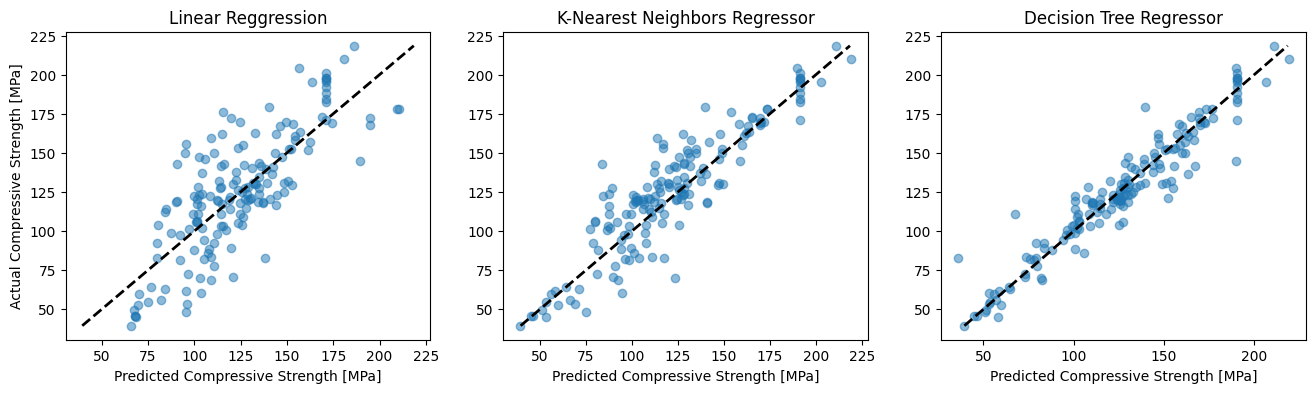

In [47]:
# set figsize
plt.figure(figsize = [16, 4])

plt.subplot(1, 3, 1)
plt.scatter(test_predictions_corr["lr_predict"], test_predictions_corr["fcu"], alpha=0.5)
plt.plot([y_test_corr.min(), y_test_corr.max()], [y_test_corr.min(), y_test_corr.max()], 'k--', lw=2)
plt.xlabel("Predicted Compressive Strength [MPa]")
plt.ylabel("Actual Compressive Strength [MPa]")
plt.title("Linear Reggression");

plt.subplot(1, 3, 2)
plt.scatter(test_predictions_corr["knn_predict"], test_predictions_corr["fcu"], alpha=0.5)
plt.plot([y_test_corr.min(), y_test_corr.max()], [y_test_corr.min(), y_test_corr.max()], 'k--', lw=2)
plt.xlabel("Predicted Compressive Strength [MPa]")
plt.title("K-Nearest Neighbors Regressor");

plt.subplot(1, 3, 3)
plt.scatter(test_predictions_corr["dt_predict"], test_predictions_corr["fcu"], alpha=0.5)
plt.plot([y_test_corr.min(), y_test_corr.max()], [y_test_corr.min(), y_test_corr.max()], 'k--', lw=2)
plt.xlabel("Predicted Compressive Strength [MPa]")
plt.title("Decision Tree Regressor");

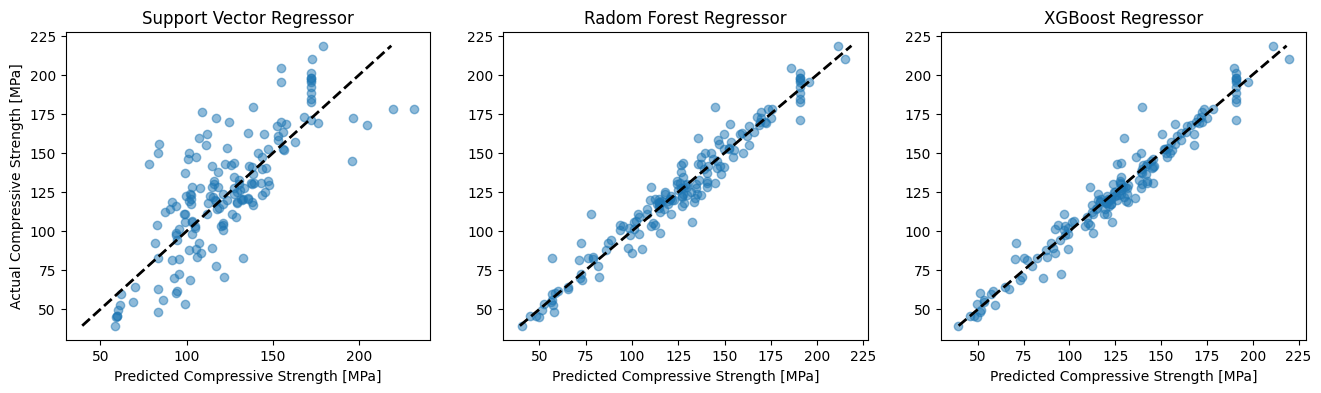

In [48]:
# set figsize
plt.figure(figsize = [16, 4])

plt.subplot(1, 3, 1)
plt.scatter(test_predictions_corr["svr_predict"], test_predictions_corr["fcu"], alpha=0.5)
plt.plot([y_test_corr.min(), y_test_corr.max()], [y_test_corr.min(), y_test_corr.max()], 'k--', lw=2)
plt.xlabel("Predicted Compressive Strength [MPa]")
plt.ylabel("Actual Compressive Strength [MPa]")
plt.title("Support Vector Regressor");

plt.subplot(1, 3, 2)
plt.scatter(test_predictions_corr["rf_predict"], test_predictions_corr["fcu"], alpha=0.5)
plt.plot([y_test_corr.min(), y_test_corr.max()], [y_test_corr.min(), y_test_corr.max()], 'k--', lw=2)
plt.xlabel("Predicted Compressive Strength [MPa]")
plt.title("Radom Forest Regressor");

plt.subplot(1, 3, 3)
plt.scatter(test_predictions_corr["xgb_predict"], test_predictions_corr["fcu"], alpha=0.5)
plt.plot([y_test_corr.min(), y_test_corr.max()], [y_test_corr.min(), y_test_corr.max()], 'k--', lw=2)
plt.xlabel("Predicted Compressive Strength [MPa]")
plt.title("XGBoost Regressor");

### FS Using PCA

In [ ]:
scaler = StandardScaler()
X_sca = scaler.fit_transform(X)
X_sca[:1]

array([[-1.66088517, -0.33900326, -0.83577025, -0.31514276, -0.41784768,
        -0.38957164, -0.46822406, -3.51790714, -0.70057565,  2.91093711,
        -0.74542917, -0.86028067, -0.38253979, -0.24201434, -0.17131318]])

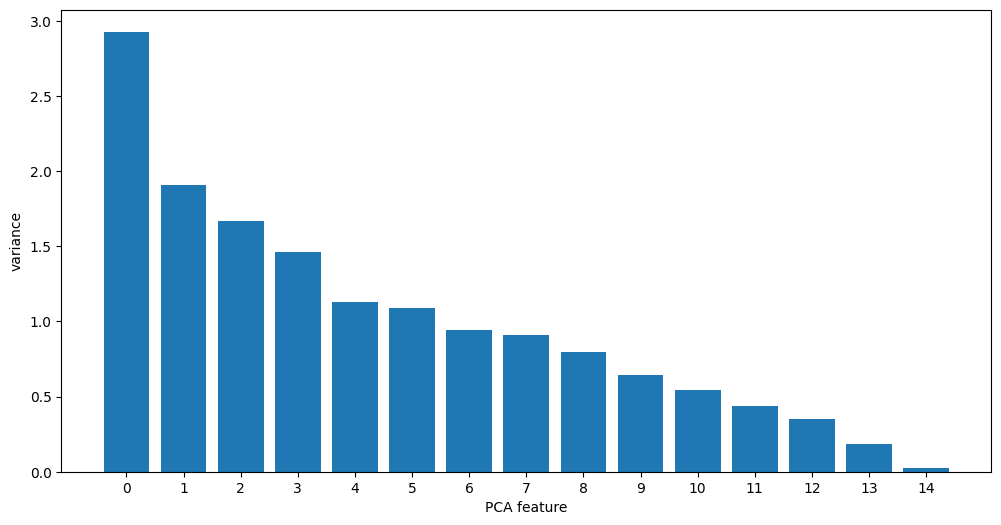

In [ ]:
pca = PCA()
# Fit Traning data
pca.fit(X_sca)

features = range(pca.n_components_)
# set figsize
plt.figure(figsize=[12, 6])
# visualize the variance
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

In [ ]:
# feature selection using PCA

pca = PCA(n_components=10)
pca_components = pca.fit_transform(X_sca)
pca_df = pd.DataFrame(data=pca_components, columns=["pc1", "pc2", "pc3", "pc4", "pc5", "pc6", "pc7", "pc8", "pc9", "pc10"])
pca_df["fcu"] = y
pca_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,fcu
0,4.209324,0.192111,0.314129,-0.304644,0.387567,-1.573857,-0.342921,0.718015,-1.456430,-0.928949,131.0
1,3.103804,0.669528,-0.417414,-0.439420,0.329404,-0.943484,-0.108664,0.694362,-1.322287,-0.611654,135.0
2,1.969542,1.163444,-1.143029,-0.572518,0.265521,-0.287969,0.124698,0.663371,-1.193362,-0.277673,137.0
3,1.969542,1.163444,-1.143029,-0.572518,0.265521,-0.287969,0.124698,0.663371,-1.193362,-0.277673,137.0
4,3.351039,1.242611,0.276672,0.661564,-0.030073,-0.775184,-0.276486,-0.788255,-1.039007,-0.275258,150.0


In [ ]:
# Split Data
X_pca = pca_df.drop("fcu", axis=1)
y_pca = pca_df["fcu"]

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

print("X_train_pca Shape: ", X_train_pca.shape)
print("X_test_pca Shape: ", X_test_pca.shape)
print("y_train_pca Shape: ", y_train_pca.shape)
print("y_test_pca Shape: ", y_test_pca.shape)

X_train_pca Shape:  (648, 10)
X_test_pca Shape:  (162, 10)
y_train_pca Shape:  (648,)
y_test_pca Shape:  (162,)


#### Random Forest Model with FS PCA

In [ ]:
rf_model_pca = RandomForestRegressor(random_state=42)
rf_model_pca.fit(X_train_pca, y_train_pca)
y_pred_train_pca = rf_model_pca.predict(X_train_pca)
y_pred_test_pca = rf_model_pca.predict(X_test_pca)

performance_measure(y_train_pca, y_pred_train_pca, y_test_pca, y_pred_test_pca)

Train MAE:  4.6535	Test MAE:  11.8181
Train RMSE:  6.4693	Test RMSE:  18.5294
Train R2 Score:  0.9746	Test R2 Score:  0.77


### FS Using L1 Penalization

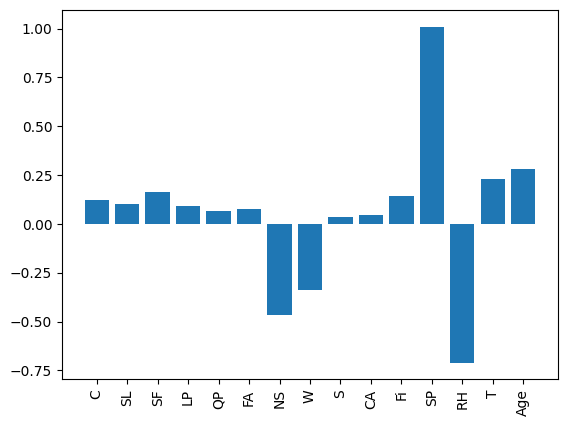

In [ ]:
names = X_train.columns
lasso = Lasso(alpha=0.0001)
lasso_coef = lasso.fit(X_train, y_train).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=90)
plt.show()

In [ ]:
lasso_coef

array([ 0.12235231,  0.1035334 ,  0.16577784,  0.09004789,  0.06533772,
        0.07748788, -0.46768753, -0.34033776,  0.0363735 ,  0.04661347,
        0.14386809,  1.01025082, -0.70970952,  0.23182748,  0.2810084 ])

In [11]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Assume X is the feature matrix and y is the target vector
model = Lasso(alpha=0.01)
model.fit(X, y)

# Select features based on LASSO
model = SelectFromModel(model, prefit=True)
selected_features = X.columns[model.get_support()]
print("Selected Features: ", selected_features)


Selected Features:  Index(['C', 'SL', 'SF', 'LP', 'QP', 'FA', 'NS', 'W', 'S', 'CA', 'Fi', 'SP',
       'RH', 'T', 'Age'],
      dtype='object')


In [ ]:
# prompt: feature selection using L1 penalization

lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

print("Train MAE: ", round(mean_absolute_error(y_train, y_pred_train), 2), end="\t")
print("Test MAE: ", round(mean_absolute_error(y_test, y_pred_test), 2))
print("Train RMSE: ", round(np.sqrt(mean_squared_error(y_train, y_pred_train)),2), end="\t")
print("Test RMSE: ", round(np.sqrt(mean_squared_error(y_test, y_pred_test)),2))
print("Train R2 Score: ", round(r2_score(y_train, y_pred_train), 2), end="\t")
print("Test R2 Score: ", round(r2_score(y_test, y_pred_test), 2))

lasso_coef = lasso.coef_
lasso_coef[lasso_coef!=0]


Train MAE:  17.25	Test MAE:  16.59
Train RMSE:  21.53	Test RMSE:  20.99
Train R2 Score:  0.72	Test R2 Score:  0.7


array([ 0.12235231,  0.1035334 ,  0.16577784,  0.09004789,  0.06533772,
        0.07748788, -0.46768753, -0.34033776,  0.0363735 ,  0.04661347,
        0.14386809,  1.01025082, -0.70970952,  0.23182748,  0.2810084 ])

### Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Assume X is your feature matrix and y is your target variable
model = RandomForestRegressor()
rfe = RFE(estimator=model, n_features_to_select=8)
fit = rfe.fit(X, y)

# Selected features
selected_features = X.columns[fit.support_]
print("Selected Features: ", selected_features)

Selected Features:  Index(['C', 'SF', 'W', 'S', 'CA', 'Fi', 'SP', 'Age'], dtype='object')


## Explanable AI

In [21]:
# Load models
rf_gcv = joblib.load("./models/rf_gcv.pkl")
rf_gcv_corr = joblib.load("./models/rf_gcv_corr.pkl")
xgb_gcv = joblib.load("./models/xgb_gcv.pkl")
xgb_gcv_corr = joblib.load("./models/xgb_gcv_corr.pkl")

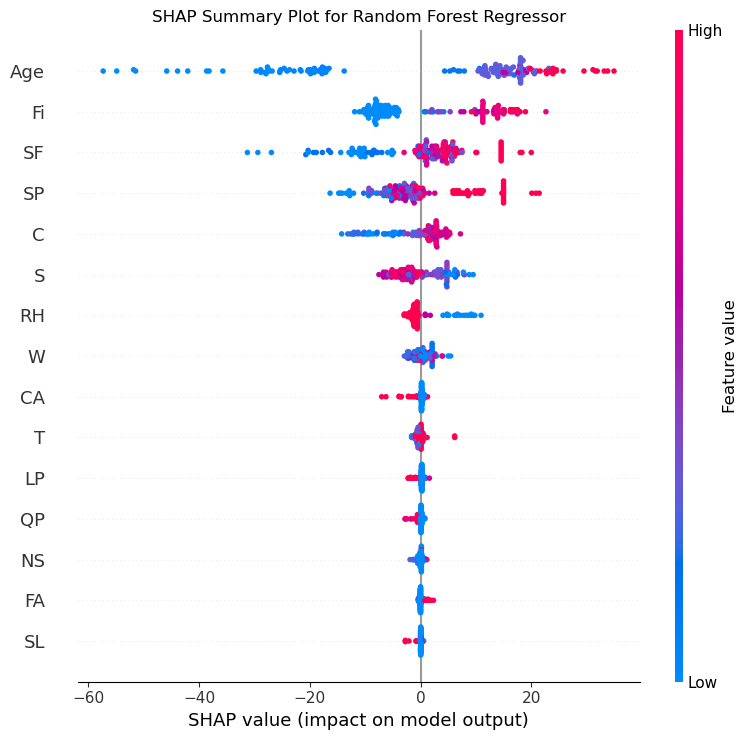

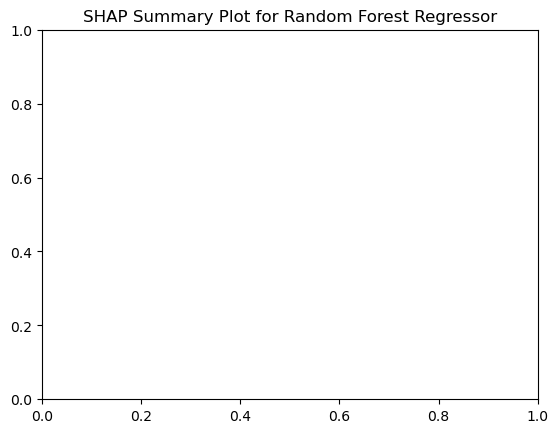

In [12]:
# Explain RFR predictions
explainer = shap.TreeExplainer(rf_gcv.best_estimator_)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test)
plt.title("SHAP Summary Plot for Random Forest Regressor")
plt.show();

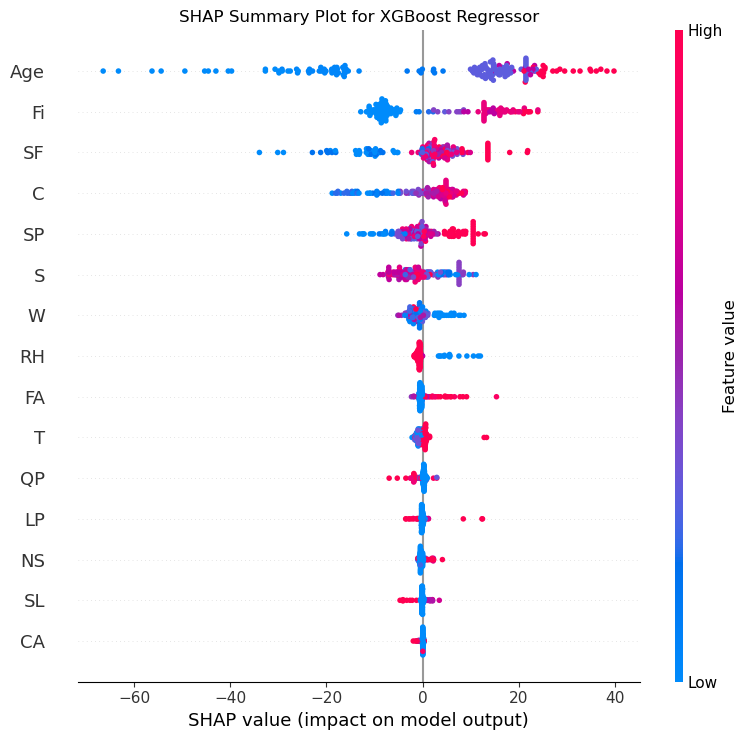

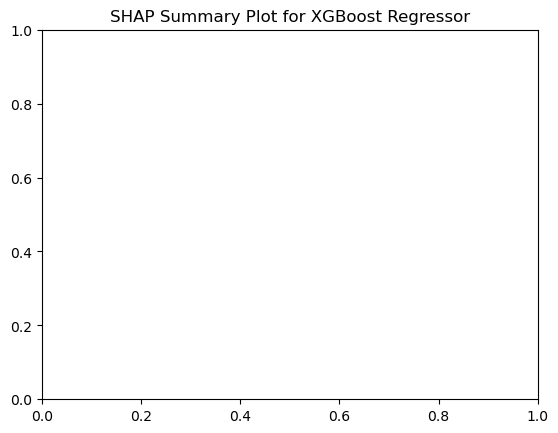

In [17]:
# Explain XGB predictions
explainer = shap.TreeExplainer(xgb_gcv.best_estimator_)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test)
plt.title("SHAP Summary Plot for XGBoost Regressor")
plt.show();

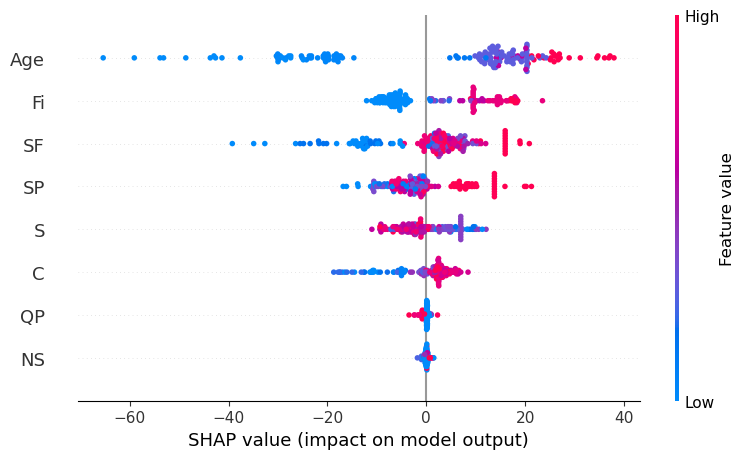

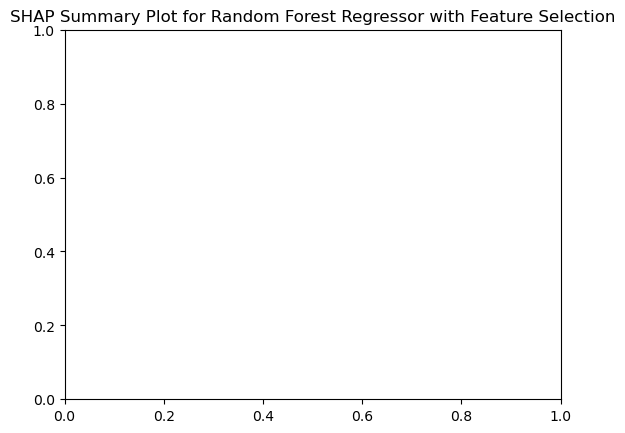

In [48]:
# Explain RFR predictions
explainer = shap.TreeExplainer(rf_gcv_corr.best_estimator_)
shap_values = explainer.shap_values(X_test_corr)

# Plot the SHAP summary plot
shap.summary_plot(
    shap_values, 
    X_test_corr,
    title="SHAP Summary Plot for Random Forest Regressor with Feature Selection"
)
plt.title("SHAP Summary Plot for Random Forest Regressor with Feature Selection")
plt.show();

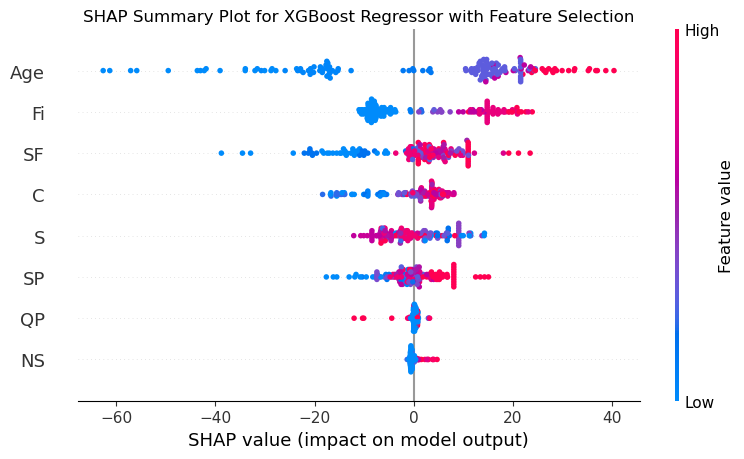

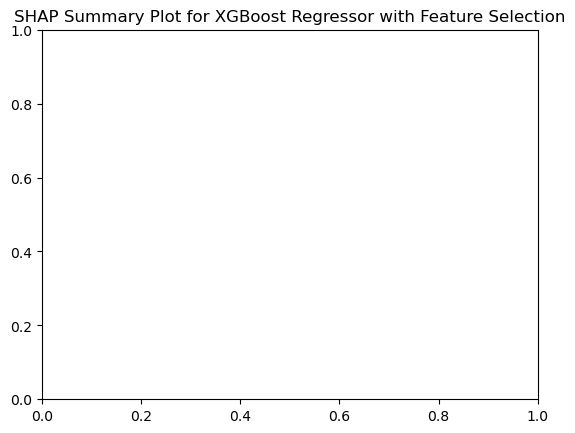

In [36]:
# Explain XGB predictions
explainer = shap.TreeExplainer(xgb_gcv_corr.best_estimator_)
shap_values = explainer.shap_values(X_test_corr)

# Plot the SHAP summary plot
shap.summary_plot(
    shap_values, 
    X_test_corr,
    title="SHAP Summary Plot for XGBoost Regressor with Feature Selection"
)
plt.title("SHAP Summary Plot for XGBoost Regressor with Feature Selection")
plt.show();

## Model Deployment

In [ ]:
# app.py
import streamlit as st
import joblib
import numpy as np

# Load models
rf_gcv_corr = joblib.load("./models/rf_gcv_corr.pkl")
xgb_gcv_corr = joblib.load("./models/xgb_gcv_corr.pkl")

# Streamlit App
models = {
    "Xgboost Regression": xgb_gcv_corr.best_estimator_,
    "Random Forest": rf_gcv_corr.best_estimator_,
}

# Streamlit App
st.title("Deploy UHPC CS Multiple Regression Models")
st.write("Select a model and provide input features to get predictions.")

# Dropdown to select the model
model_name = st.selectbox("Select a Model", list(models.keys()))
selected_model = models[model_name]

# Define unique names for the features
feature_names = [
    "Cement (kg/m^3)", 
    "Silica Fume (kg/m^3)", 
    "Quartz Powder (kg/m^3)", 
    "Nano Silica (kg/m^3)", 
    "Fine Aggregate (kg/m^3)",
    "Steel Fiber (kg/m^3)",
    "Superplasticizer (kg/m^3)", 
    "Age (days)"
]

# Input fields for the features
features = []
for feature_name in feature_names:
    feature_value = st.number_input(f"Enter {feature_name}:", key=feature_name)
    features.append(feature_value)

# Predict button
if st.button("Predict"):
    input_data = np.array([features]).reshape(1, -1)  # Ensure proper shape
    prediction = selected_model.predict(input_data)
    st.write(f"Selected Model: {model_name}")
    st.write(f"Predicted Target: {prediction[0]:.2f}")
